#VISUALISATIE 1 NETWERK GUIDO GEZELLE

##INTRO

Dit is een voorbeeld van een netwerkvisualisatie omtrent Guido Gezelle met beschikbare data op Wikidata. Deze visualisatie vormt de eerste van meerdere visualisaties omtrent Guido Gezelle op Wikidata. Deze visualisatie vormt daarmee een inleiding op de meer complexe visualisaties (zie andere handleidingen). Wat volgt, is een handleiding om deze visualisatie te creeëren.

##VRAAG

Wie heeft een band met Guido Gezelle en wat is die band? en omgekeerd, aan wie is Guido Gezelle gekoppeld en in welke verbanden? Graag willen we ook de link naar de wikidata-items, Wikipedia-pagina, Wikicommons, viaf en een foto weergeven, indien beschikbaar.

##QUERIES

Om deze vragen te beantwoorden, maken we gebruik van de informatie die beschikbaar is op Wikidata omtrent Guido Gezelle. Op Wikidata is veel informatie verzameld en volgens een specifiek relationeel model gestructureerd. Zo kan data eenvoudig aan elkaar gelinkt worden en in relatie tot elkaar opgevraagd worden. Hiervoor gebruiken we de Wikidata Query service. In deze service is het mogelijk om queries te ontwerpen op basis van codetaal. De codetaal die hiervoor gebruikt wordt is SPARQL. Over deze codetaal is veel documentatie terug te vinden. Hieronder hebben we enkele queries opgesteld met behulp van deze service. Daarnaast hebben we ook gebruik gemaakt van generatieve AI, in dit geval Gemini om de queries te stroomlijnen of wat tijd uit te sparen bij het testen van enkele varianten.

Opmerking: de rekencapaciteit van Wikidata Query Service is snel overbelast. Queries mogen dus niet te uitgebreid of complex zijn. Dit zorgt voor server overload. Om die reden worden in deze voorbeelden de vraagstelling opgedeeld in verschillende deelvragen, die elk met een simpele query beantwoord kunnen worden.

Om tot antwoorden op de vraagstelling te komen, hebben we twee queries nodig. De eerste query toont alle personen die aan Guido Gezelle zijn gekoppeld. De tweede query toont alle personen waaraan Guido Gezelle gekoppeld is. We vragen ook de link naar Wikipediapagina, Wiki Commons, Wikidata en een afbeelding. Daarnaast willen we ook een link naar het biografisch portaal en naar VIAF, indien beschikbaar. Echter kunnen we nog een laag dieper graven en kijken naar welke soorten relevante personen er zijn. Op die manier kan de relatie met Guido Gezelle nog verduidelijkt worden. Onder de eigenschap 'relevant persoon', kan 'een rol' nog verder toebedeeld worden, en deze rol kan bijvoorbeeld 'correspondent', 'vriend', enzovoort zijn. Om deze informatie binnen te halen, stellen we twee extra queries op. Deze kijken binnen de relatie van 'relevant persoon' naar de diepere laag bv 'rol van', in dit geval 'correspondent'. We kunnen echter nog een stap verder gaan en dezelfde beschouwing uitvoeren voor de familierelaties. Zo kunnen we ook nog een laag dieper kijken. Een andere optie is om deze info verderop handmatig toe te voegen, aangezien het 'maar' over zo'n 60-tal familieleden gaat.

###Query1A

In [ ]:
##V1Q1A: alle personen die gekoppeld zijn aan Guido Gezelle met wiki-links, viaf en bioportaal.
SELECT ?person ?personLabel ?relatieItemLabel ?richting
       ?wikidataLink ?wikipediaLink ?commonsLink
       ?image ?bioPortaalLink ?viafLink # <--- NIEUW: Biografisch Portaal en VIAF toegevoegd
WHERE {
  BIND(wd:Q336977 AS ?guido)
  BIND("Guido naar Persoon" as ?richting)
  ?guido ?relatie ?person.
  ?person wdt:P31 wd:Q5.

  # --- WIKIDATA ITEM LINK ---
  BIND(REPLACE(STR(?person), "http://www.wikidata.org/entity/", "https://www.wikidata.org/wiki/") AS ?wikidataLink)

  # Wikidata image ophalen
  OPTIONAL { ?person wdt:P18 ?image. }

  # Zet property om van wdt:Pxxx naar wd:Qxxx zodat labels werken
  BIND(IRI(REPLACE(STR(?relatie), "prop/direct/", "entity/")) AS ?relatieItem)

  # --- MEDIA LINKS ---

  # 1. Wikipedia Link (Nederlands)
  OPTIONAL {
    ?wikipediaLink schema:about ?person;
                   schema:isPartOf <https://nl.wikipedia.org/>.
  }

  # 2. Wikimedia Commons Categorie
  OPTIONAL {
    ?person wdt:P373 ?commonsCategory.
    BIND(CONCAT("https://commons.wikimedia.org/wiki/Category:", ?commonsCategory) AS ?commonsLink)
  }

  # 3. VIAF Link (P214)
  OPTIONAL {
    ?person wdt:P214 ?viafID.
    BIND(CONCAT("https://viaf.org/viaf/", ?viafID) AS ?viafLink)
  }


  # --- Labels ophalen ---
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "nl,en".
    ?relatieItem rdfs:label ?relatieItemLabel.
    ?person rdfs:label ?personLabel.
    ?guido rdfs:label ?guidoLabel.
  }
}
ORDER BY ?personLabel

###Query1B

In [ ]:
##V1Q1B: alle personen waaraan Guido Gezelle gekoppeld is met wiki-links, viaf en bioportaal.
SELECT ?person ?personLabel ?relatieItemLabel ?richting
       ?wikidataLink ?wikipediaLink ?commonsLink
       ?image ?bioPortaalLink ?viafLink # <--- NIEUW: Biografisch Portaal en VIAF toegevoegd
WHERE {
  BIND(wd:Q336977 AS ?guido)
  BIND("Persoon naar Guido" as ?richting) # Let op de richting van de relatie in deze query
  ?person ?relatie ?guido.
  ?person wdt:P31 wd:Q5.

  # --- WIKIDATA ITEM LINK ---
  # Creëert een klikbare HTTPS link naar de Wikidata-pagina (bijv. https://www.wikidata.org/wiki/Q123)
  BIND(REPLACE(STR(?person), "http://www.wikidata.org/entity/", "https://www.wikidata.org/wiki/") AS ?wikidataLink)

  # Wikidata image ophalen
  OPTIONAL { ?person wdt:P18 ?image. }

  # Zet property om van wdt:Pxxx naar wd:Qxxx zodat labels werken
  BIND(IRI(REPLACE(STR(?relatie), "prop/direct/", "entity/")) AS ?relatieItem)

  # --- MEDIA LINKS ---

  # 1. Wikipedia Link (Nederlands)
  OPTIONAL {
    ?wikipediaLink schema:about ?person;
                   schema:isPartOf <https://nl.wikipedia.org/>.
  }

  # 2. Wikimedia Commons Categorie
  OPTIONAL {
    ?person wdt:P373 ?commonsCategory.
    BIND(CONCAT("https://commons.wikimedia.org/wiki/Category:", ?commonsCategory) AS ?commonsLink)
  }

  # --- AUTORITEITSGEGEVENS LINKS (NIEUW) ---

  # 3. VIAF Link (P214)
  OPTIONAL {
    ?person wdt:P214 ?viafID.
    BIND(CONCAT("https://viaf.org/viaf/", ?viafID) AS ?viafLink)
  }


  # --- Labels ophalen ---
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "nl,en".
    ?relatieItem rdfs:label ?relatieItemLabel.
    ?person rdfs:label ?personLabel.
    ?guido rdfs:label ?guidoLabel.
  }
}
ORDER BY ?personLabel

###Query2A

In [ ]:
#V1Q2A: alle personen waaraan guido gelinkt is als relevant persoon, en met specificatie van de 'relevant persoon' relaties.
SELECT ?person ?personLabel ?rolItem ?rolLabel ?richting
       ?wikidataLink ?wikipediaLink ?commonsLink
       ?image ?bioPortaalLink ?viafLink
WHERE {
  BIND(wd:Q336977 AS ?guido)
  BIND("Persoon naar Guido" as ?richting)

  # 1. Statement opvragen (p:P3342 - Full statement)
  ?person p:P3342 ?statement.

  # 2. Bevestigen dat de statementwaarde (ps:P3342 - Statement value) naar Guido gaat
  ?statement ps:P3342 ?guido.

  # 3. De "laag dieper": De Qualifier (pq:P3831 - Qualifier)
  # Haal de rol (?rolItem) op die als qualifier is toegevoegd
  ?statement pq:P3831 ?rolItem.

  ?person wdt:P31 wd:Q5. # Zorg dat het een mens is

  # --- WIKIDATA EN MEDIA LINKS ---
  BIND(REPLACE(STR(?person), "http://www.wikidata.org/entity/", "https://www.wikidata.org/wiki/") AS ?wikidataLink)

  # Wikidata image ophalen
  OPTIONAL { ?person wdt:P18 ?image. }

  # 1. Wikipedia Link (Nederlands)
  OPTIONAL {
    ?wikipediaLink schema:about ?person;
                   schema:isPartOf <https://nl.wikipedia.org/>.
  }

  # 2. Wikimedia Commons Categorie
  OPTIONAL {
    ?person wdt:P373 ?commonsCategory.
    BIND(CONCAT("https://commons.wikimedia.org/wiki/Category:", ?commonsCategory) AS ?commonsLink)
  }

  # --- AUTORITEITSGEGEVENS LINKS (ONGEWIJZIGD) ---

  # 3. VIAF Link (P214)
  OPTIONAL {
    ?person wdt:P214 ?viafID.
    BIND(CONCAT("https://viaf.org/viaf/", ?viafID) AS ?viafLink)
  }


  # --- Labels ophalen ---
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "nl,en".
    ?person rdfs:label ?personLabel.
    ?guido rdfs:label ?guidoLabel.
    # Label voor de Rol (bv. 'correspondent')
    ?rolItem rdfs:label ?rolLabel.
  }
}
ORDER BY ?rolLabel ?personLabel

###Query2B

In [ ]:
#V1Q2B: alle personen waaraan guido gelinkt is als relevant persoon, en met specificatie van de 'relevant persoon' relaties.
SELECT ?person ?personLabel ?rolItem ?rolLabel ?richting
       ?wikidataLink ?wikipediaLink ?commonsLink
       ?image ?bioPortaalLink ?viafLink
WHERE {
  BIND(wd:Q336977 AS ?guido)
  BIND("Guido naar Persoon" as ?richting)

  # 1. Statement opvragen (p:P3342 - Full statement)
  ?guido p:P3342 ?statement.

  # 2. Bevestigen dat de statementwaarde (ps:P3342 - Statement value) naar Guido gaat
  ?statement ps:P3342 ?person.

  # 3. De "laag dieper": De Qualifier (pq:P3831 - Qualifier)
  # Haal de rol (?rolItem) op die als qualifier is toegevoegd
  ?statement pq:P3831 ?rolItem.

  ?person wdt:P31 wd:Q5. # Zorg dat het een mens is

  # --- WIKIDATA EN MEDIA LINKS ---
  BIND(REPLACE(STR(?person), "http://www.wikidata.org/entity/", "https://www.wikidata.org/wiki/") AS ?wikidataLink)

  # Wikidata image ophalen
  OPTIONAL { ?person wdt:P18 ?image. }

  # 1. Wikipedia Link (Nederlands)
  OPTIONAL {
    ?wikipediaLink schema:about ?person;
                   schema:isPartOf <https://nl.wikipedia.org/>.
  }

  # 2. Wikimedia Commons Categorie
  OPTIONAL {
    ?person wdt:P373 ?commonsCategory.
    BIND(CONCAT("https://commons.wikimedia.org/wiki/Category:", ?commonsCategory) AS ?commonsLink)
  }

  # --- AUTORITEITSGEGEVENS LINKS (ONGEWIJZIGD) ---

  # 3. VIAF Link (P214)
  OPTIONAL {
    ?person wdt:P214 ?viafID.
    BIND(CONCAT("https://viaf.org/viaf/", ?viafID) AS ?viafLink)
  }


  # --- Labels ophalen ---
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "nl,en".
    ?person rdfs:label ?personLabel.
    ?guido rdfs:label ?guidoLabel.
    # Label voor de Rol (bv. 'correspondent')
    ?rolItem rdfs:label ?rolLabel.
  }
}
ORDER BY ?rolLabel ?personLabel

###Query3A

In [ ]:
#V1Q3A- alle personen gelinkt aan Guido door een familieband met specificatie
SELECT DISTINCT ?person ?personLabel ?kinshipItem ?kinshipLabel ?richting
       ?wikidataLink ?wikipediaLink ?commonsLink
       ?image ?viafLink
WHERE {
  BIND(wd:Q336977 AS ?guido)

  # --- CORE: Zoek naar P1038 statements in twee richtingen ---
  {
    # Richting 1: Persoon is de Subject (Guido heeft deze Persoon als relatieve)
    ?guido p:P1038 ?statement.
    ?statement ps:P1038 ?person.
    BIND("Guido naar Persoon" AS ?richting)
  }

  # --- SPECIFICATIE: Haal de specifieke verwantschapsrol op (P1039) ---
  # Dit levert de "diepere specificatie" (bv. 'aunt' Q56507)
  ?statement pq:P1039 ?kinshipItem.

  ?person wdt:P31 wd:Q5. # Zorg dat het een mens is

  # --- LINKS EN MEDIA (Hetzelfde als je vorige queries) ---
  BIND(REPLACE(STR(?person), "http://www.wikidata.org/entity/", "https://www.wikidata.org/wiki/") AS ?wikidataLink)

  OPTIONAL { ?person wdt:P18 ?image. }
  OPTIONAL {
    ?wikipediaLink schema:about ?person;
                   schema:isPartOf <https://nl.wikipedia.org/>.
  }
  OPTIONAL {
    ?person wdt:P373 ?commonsCategory.
    BIND(CONCAT("https://commons.wikimedia.org/wiki/Category:", ?commonsCategory) AS ?commonsLink)
  }
  OPTIONAL {
    ?person wdt:P214 ?viafID.
    BIND(CONCAT("https://viaf.org/viaf/", ?viafID) AS ?viafLink)
  }

  # --- Labels ophalen ---
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "nl,en".
    ?person rdfs:label ?personLabel.
    ?guido rdfs:label ?guidoLabel.
    # Label voor de specifieke verwantschap (bv. 'tante' of 'neef')
    ?kinshipItem rdfs:label ?kinshipLabel.
  }
}
ORDER BY ?kinshipLabel ?personLabel

###Query3B

In [ ]:
#V1Q3B-alle personen waaraan Guido gelinkt is door een familieband met specificatie
SELECT DISTINCT ?person ?personLabel ?kinshipItem ?kinshipLabel ?richting
       ?wikidataLink ?wikipediaLink ?commonsLink
       ?image ?viafLink
WHERE {
  BIND(wd:Q336977 AS ?guido)

  # --- CORE: Zoek naar P1038 statements in twee richtingen ---
  {
    # Richting 2: Guido is de Subject (Persoon heeft Guido als relatieve)
    ?person p:P1038 ?statement.
    ?statement ps:P1038 ?guido.
    BIND("Persoon naar Guido" AS ?richting)
  }

  # --- SPECIFICATIE: Haal de specifieke verwantschapsrol op (P1039) ---
  # Dit levert de "diepere specificatie" (bv. 'aunt' Q56507)
  ?statement pq:P1039 ?kinshipItem.

  ?person wdt:P31 wd:Q5. # Zorg dat het een mens is

  # --- LINKS EN MEDIA (Hetzelfde als je vorige queries) ---
  BIND(REPLACE(STR(?person), "http://www.wikidata.org/entity/", "https://www.wikidata.org/wiki/") AS ?wikidataLink)

  OPTIONAL { ?person wdt:P18 ?image. }
  OPTIONAL {
    ?wikipediaLink schema:about ?person;
                   schema:isPartOf <https://nl.wikipedia.org/>.
  }
  OPTIONAL {
    ?person wdt:P373 ?commonsCategory.
    BIND(CONCAT("https://commons.wikimedia.org/wiki/Category:", ?commonsCategory) AS ?commonsLink)
  }
  OPTIONAL {
    ?person wdt:P214 ?viafID.
    BIND(CONCAT("https://viaf.org/viaf/", ?viafID) AS ?viafLink)
  }

  # --- Labels ophalen ---
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "nl,en".
    ?person rdfs:label ?personLabel.
    ?guido rdfs:label ?guidoLabel.
    # Label voor de specifieke verwantschap (bv. 'tante' of 'neef')
    ?kinshipItem rdfs:label ?kinshipLabel.
  }
}
ORDER BY ?kinshipLabel ?personLabel

Voor de verdere visualisatie gebruiken we dus de zes bovenstaande queries.

##EXPORT

Vervolgens moet de data gedownload worden en verder worden verwerkt in software zoals Spreadsheets, Excel, OpenRefine, enzvoort. Hier is het doel om een bestand met knopen en een bestand met verbindingen te maken, aangezien dat de twee bouwstenen van de visualisatie worden.

Voer de queries afzonderlijk uit in de Wikidata Query Service en exporteer de resultaten telkens als CSV. Open een nieuw spreadsheetprogramma (Excel, Google Sheets) en importeer de gegevens in de spreadsheets via de menu-balk. Importeer elk van de csv-bestanden in een afzonderlijk tabblad en noem ze 'V1Q1A RAW', 'V1Q1BRAW, 'V1Q2ARAW', enzovoort.

Omdat de kolommen van 1A en 1B hetzelfde zijn, kunnen deze onder elkaar worden geplak in een nieuw tabblad. Hetzelfde kunnen we doen voor kolommen 2A en 2B, alsook voor 3A en 3B.
Dupliceer V1Q1ARAW en noem het "Rawdata1".Plak de resultaten van QUERY 1B direct onder de resultaten van de eerste query in het Rawdata-bestand (zonder de koprijen te herhalen).

Herhaal dit proces voor het tweede en derde paar queries. Nu kunnen we het knopenbestand en verbindingenbestand maken.



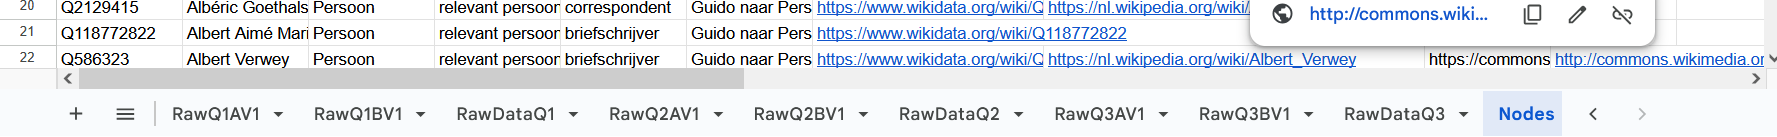

## NODES

Het knopenbestand moet alle unieke entiteiten bevatten: in dit geval Guido Gezelle en alle verbonden personen (?person). Je hebt daarvoor minimaal de kolommen 'Id' en 'Label' nodig. Daarnaast voegen we ook enkele attributen toe om weer te geven in de visualisatie, in dit geval de link naar Wikipedia pagina, wikicommons en wikidata, en wikidata image, indien beschikbaar.

**Instructies voor Nodes CSV**

1. Maak een nieuw tabblad en noem het 'nodes'. Kopieer RawdataQ1 en plak het in het Verander de naam van de kolom 'person' in 'ID', de kolom 'personLabel' in 'Label' in het nodes-bestand.

2. Maak een derde kolom aan met de naam 'Type' en verander de inhoud van alle cellen in 'person'. (vul eerste cel in met 'person' en sleep naar beneden.);

4. Hou de namen 'relatietype', 'wikidataLink', 'wikipediaLink', 'commonsLink', 'image', 'viafLink' of geef de kolommen een betere naam in het node-bestand. Dit worden de attributen in Gephi (extra data op basis waarvan we later kunnen visualiseren).

5. Specifieke relatie van relevante personen en van familie achterhalen:

`= IF((D2="relevant persoon"); VLOOKUP(B2; RawDataQ2!$B:$D; 3; FALSE); IF(D2="familielid"; VLOOKUP(B2; RawDataQ3!$B:$D; 3; FALSE); D2))`

Uitleg: als het om een relevant persoon gaat, zoek dan de eigennaam op (b2) in het tabblad Rawdataq2 kolom B tot D en indien een match selecteer dan de 3de kolom van dit bestand. De waarde 'false' indiceert dat het om een exacte match gaat.

Als het niet om een relevant persoon gaat: Kijk of het om een familielid gaat en indien dat het geval is, zoek dan de eigennaam (B2) op in het Rawdata3 bestand Kolom B tot D en indien er een match is geef dan de bijhorende specifieke familierelatie (kolom D, derde kolom).

Indien het geen relevant persoon of familienaam is, geef dan de waarde van cel D2, dit is de relatie zonder specificatie.

Omdat de knopen zullen tonen wat de functie is ten opzichte van Guido Gezelle, verwijderen we alle waarden in de specificRelationType voor alle rijen waar de richting 'Persoon naar Guido'. Dit zijn namelijk de rollen die Guido vervult ten opzichte van deze persoon en niet omgekeerd.

6. Wikidata URL's verwijderen in de Id-kolom: Gephi kan enkel werken met de Q-nummers, niet met links. Dit kan eenvoudig opgelost worden door de kolom met de links te selecteren en dan in het hoofdmenu (bovenaan) te kiezen voor 'bewerken' en vervolgens 'zoeken en vervangen' te kiezen. Daar kan je instellen om 'http://www.wikidata.org/entity/' te vervangen door '' (leegte). Hierna blijf je enkel met de Q-nummers over. Daarna kopieer je de kolom en plak je ze terug op dezelfde plaats, maar kies 'enkel waarden plakken' in het submenu.

7. Guido Gezelle handmatig toevoegen: Voor deze visualisatie willen we Guido Gezelle als knoop in het midden. Voeg daarom de rij voor Guido Gezelle handmatig toe in de het nodes-bestand: Id: Q336977, Label: Guido Gezelle, Type: Person, wikidata link: , wikipedia link: https://en.wikipedia.org/wiki/Guido_Gezelle, wiki Commons: https://commons.wikimedia.org/wiki/Category:Guido_Gezelle, image: https://upload.wikimedia.org/wikipedia/commons/1/1d/Guido_Gezelle.jpg , viaf:https://viaf.org/en/viaf/71428001

9. Duplicaten verwijderen: we willen dat elke knoop maar één keer voorkomt. selecteer alle kolommen in het 'nodes'-blad. Ga naar het menu 'Gegevens (Data)' -> 'Gegevensopschoning (Data Cleanup)' -> 'Duplicaten verwijderen (Remove Duplicates)'. Zorg ervoor dat alle kolommen A en B zijn geselecteerd voor de controle. Dit zorgt ervoor dat elke persoon slechts één keer als knoop overblijft.

Opmerking: hier is momenteel het probleem dat mensen dubbele functies kunnen hebben en we dat op deze manier niet kunnen meenemen in de representatie van de knopen.

8. Opslaan: Sla het blad 'nodes' op via de het hoofdmenu bovenaan. Klik eerst op 'bestand' in de balk en kies vervolgens voor export/downloaden als csv-bestand. Geef het document de juiste naam bij het opslaan.


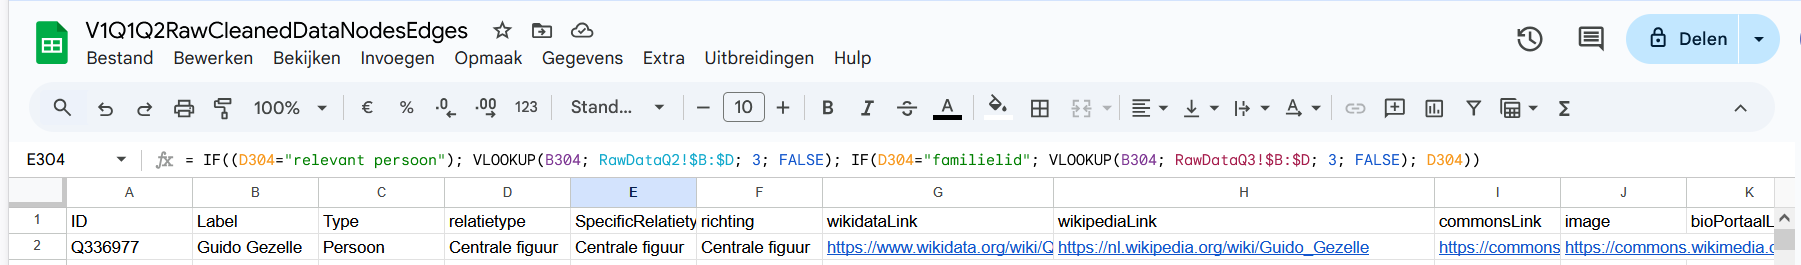

##EDGES

Het verbindingsbestand definieert de relaties (edges) tussen de knopen. Je hebt minimaal de kolommen Source (Bron) en Target (Doel) nodig, die de Q-nummers van de gekoppelde knopen bevatten. Source refereert naar de Q-ID van de bron van de relatie (?guido of ?person). Target refereert naar	de Q-ID van het doel van de relatie (?guido of ?person). Type refereert naar	de aard van de relatie (hier 'directed', maar is soms ook 'undirected'). Label is optioneel maar refereert naar	de naam van de band/relatie (?relatieItemLabel). Het gewicht (Weight)	geeft het belang of de sterkte van de relatie aan (standaard hier waarde '1').



**Instructies voor Edges CSV**

0. Maak in je spreadsheet een nieuw blad met de naam 'edges'. Dit blad zal de ruwe data bevatten die je in de volgende stappen gaat transformeren naar het uiteindelijke edges.csv formaat.

1. Kopieer deze kolommen van RawQ1 in het edges-bestand ID,Label,relatietype,SpecificRelatietype,richting (type is verwijderd). Kopieer vervolgens deze kolommen van RawQ2 eronder: person,personLabel,rolLabel, Richting. Doe hetzelfde voor deze kolommen van RawQ3: person,personLabel,kinshipLabel,richting

2. Maak daarnaast in het edges-bestand de volgende kolommen Source, Target, Type, Label en Weight aan.

3. Voordat de Source en Target bepaald kunnen worden, moeten we de pure Q-nummers (bijv. Q336977) uit de volledige URL's van de person kolom halen. Selecteer de kolom met de links en klik op bewerken in het hoofdmenu. Kies voor zoeken en vervangen. zoek 'http://www.wikidata.org/entity/' en vervang door '' (niets). Vervolgens kopieer je de kolom en plak je ze op dezelfde plaats. Kies in het submenu voor 'alleen waarden plakken'. De Q-nummers blijven over.



**Source en Target Bepalen**

Nu gebruiken we de ?richting om te bepalen wie het beginpunt (Source) en wie het eindpunt (Target) van de relatie is. Guido Gezelle heeft een vaste ID en is altijd Q336977. Andere personen hebben een variabele ID die afkomstig is uit de kolom met de lijst van de personen als Q-nummers. De richting (?richting) staat bijvoorbeeld in kolom D van onze oorspronkelijke querie.

logica:
Source:	Als de richting "Guido naar Persoon" is, is de Source Guido. Anders is de Source de andere persoon.
Target:	Als de richting "Guido naar Persoon" is, is de Target de andere persoon. Anders is de Target Guido.

4. Voer nu de volgende formules in voor de source indien de source in kolom E staat (dus startende op E2):

`=IF(D2="Guido naar Persoon"; "Q336977"; A2)`

lees: Als de richting (kolom D), dan Guido Gezelle als waarde nemen, anders neem de waarde uit A2 (in dit geval de Q-nummer in kolom person).

5. We herhalen een gelijkaardig process bij de target, maar keren de resultaten om. (startende in F2); Dat kan met deze formule
Excel

`=IF(D2="Guido naar Persoon"; A2; "Q336977")`

Sleep beide formules in de kolommen Source en Target naar beneden om alle rijen te vullen. Uw Edges blad zou nu de Q-ID's in de kolommen Source en Target moeten hebben.

6. Formules Verwijderen: Selecteer de complete kolommen Source en Target. Kopieer ze, en Plak Speciaal: Alleen Waarden (Paste Special: Values Only) over de bestaande kolommen heen. Dit verwijdert de IF-formules en behoudt alleen de Q-nummers.

7. Type Kolom: Vul de gehele kolom Type met de waarde: Directed. Label Kolom: Kopieer de volledige kolom ?relatieItemLabel naar de kolom Label. Weight Kolom: Vul de gehele kolom Weight met de waarde: 1 (Dit is de standaardwaarde).

8. Opschonen: Verwijder alle tijdelijke kolommen (Persoon_QID, ?person, ?richting, etc.).

Het blad bevat nu alleen de vijf vereiste kolommen: Source, Target, Type, RelatieLabel, Weight. Sla dit blad op als een edges.csv bestand.

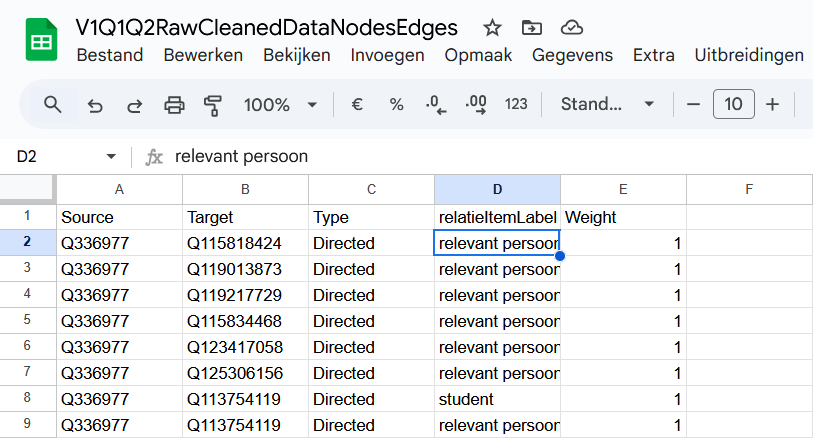

##GEPHI

In Gephi kunnen beide documenten (nodes en edges) opgeladen worden om een netwerkvisualisatie te bekomen. Hieronder wordt toegelicht hoe dat te doen.

Eerst laden we de nodes.csv in. Vervolgens laden we de edges.csv in hetzelfde spreadsheet in Gephi. Open Gephi en start een nieuw project. Vervolgens laden we eerst de node file in. Via 'file' en dan 'import spreadsheet' kunnen de documenten worden ingeladen. Selecteer het bestand en kies bij het menu 'import as' voor 'node table'. Kies vervolgens welke velden je wil houden en klik nogmaals op 'next'. Tot slot kun je de data inladen door voor het het huidige tabblad/spreadsheet te kiezen. Doe hetzelfde voor de edges-file, maar kies dan voor 'edges table'.





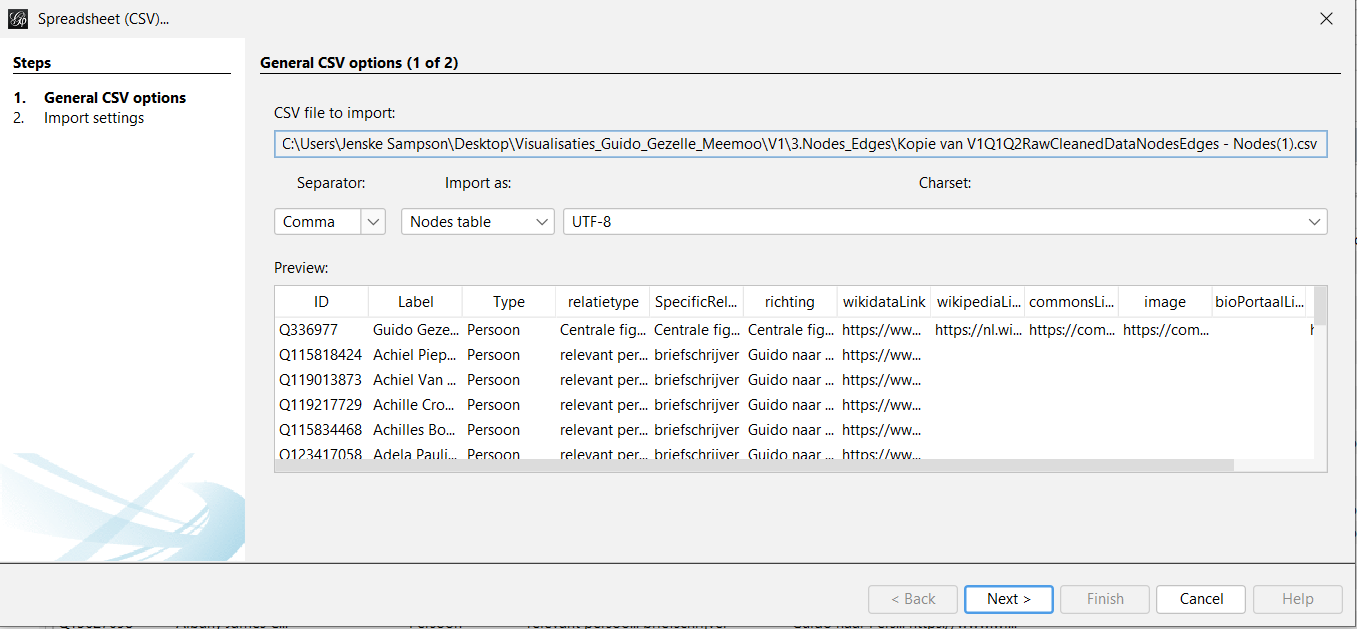

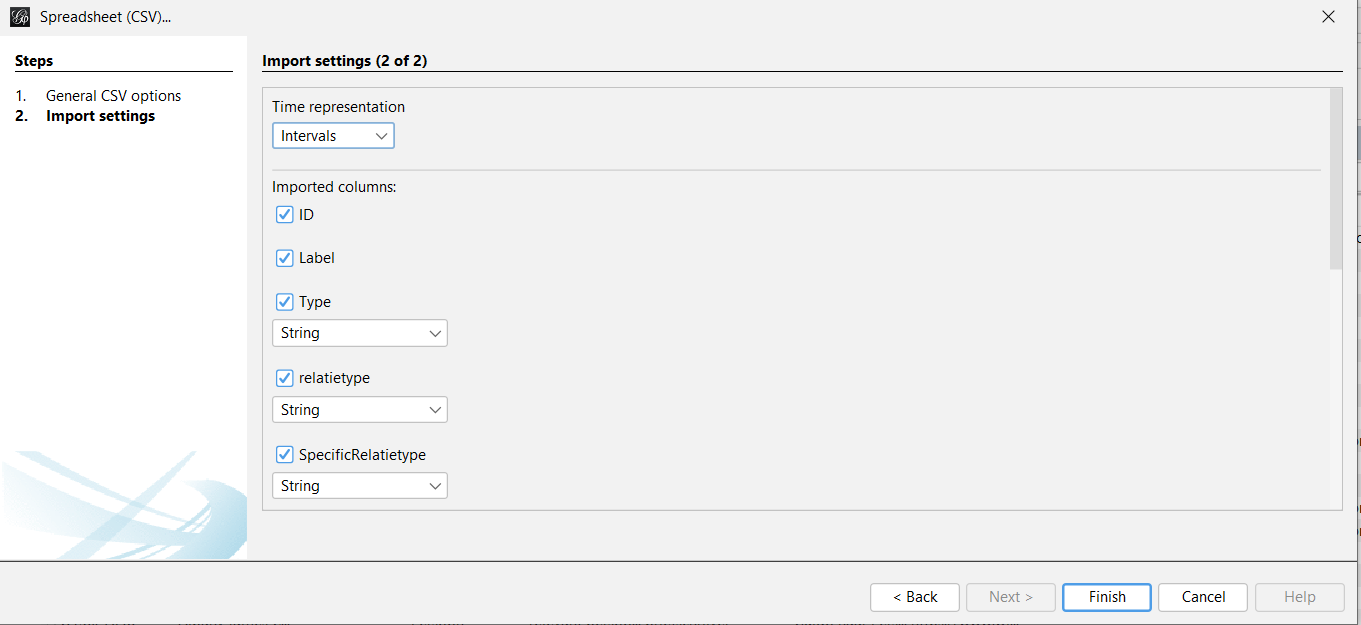


Nu beide bestanden zijn ingeladen, kan overgegaan worden op de layout van de graph. Ga in het hoofdmenu naar 'overview'. Je ziet nu volgende visualisatie:

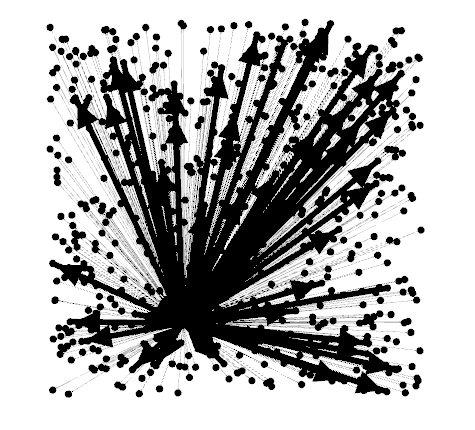

Opmerking: om problemen in visualisatie te vermijden, zullen we voor de zekerheid eerst het gewicht van elke edge manueel op 1 zetten in Gephi. Ga in het hoofdmenu naar 'data laboratory' en klik op het tabblad 'edges' (links). Vervolgens kun je alle edges selecteren (ctrl+a). Als je dan rechtermuisklik doet op deze kolom, kun je kiezen 'edit edges'. Aan de linkerkant krijg je een menu waar je voor 'weight' een waarde '1' kunt ingeven. Nu zijn alle edges hetzelfde qua gewicht.

Na deze check, ziet de visualisatie er zo uit.

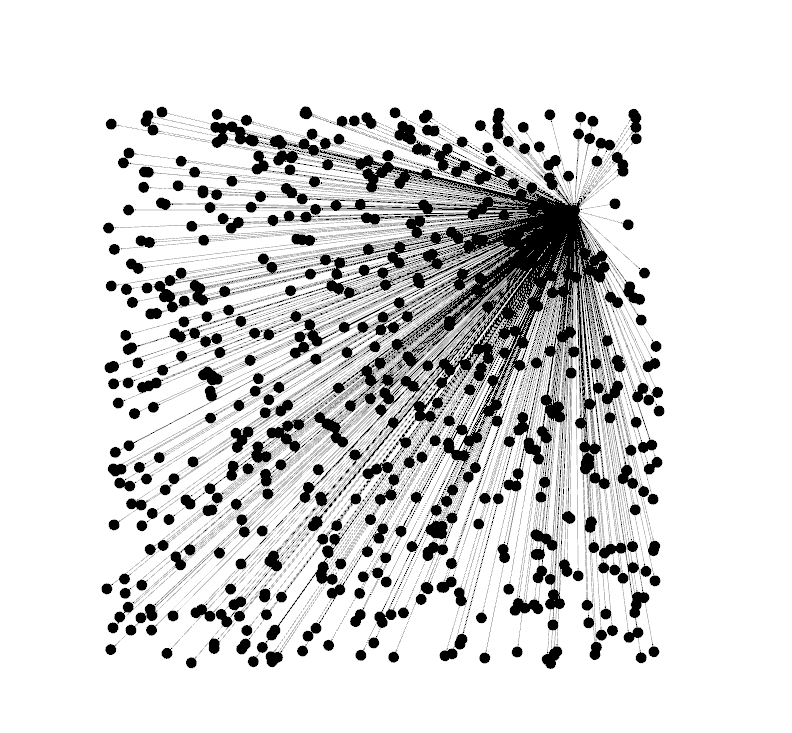

**Sorteeralgoritme**

Eerst is het nodig om de data te ordenen. Daarna kunnen we extra toevoegingen doen qua layout, zoals kleur toewijzen, enzovoort. Om tot de gewenste vorm te komen, kun je links bij 'layout' kiezen uit een lijst sorteeralgoritmes. Indien dit niet zichtbaar is, kun je via het hoofdmenu 'window' en dan 'layout' kiezen om dit menu zichtbaar te maken. Hier kiezen we voor ForceAtlas2. Pas de 'scaling' en 'gravity' aan naar waarde '55'. Klik op 'run' en wacht enkele seconden. Je krijgt nu onderstaande vorm:


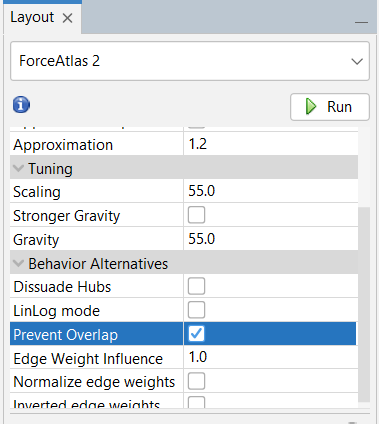

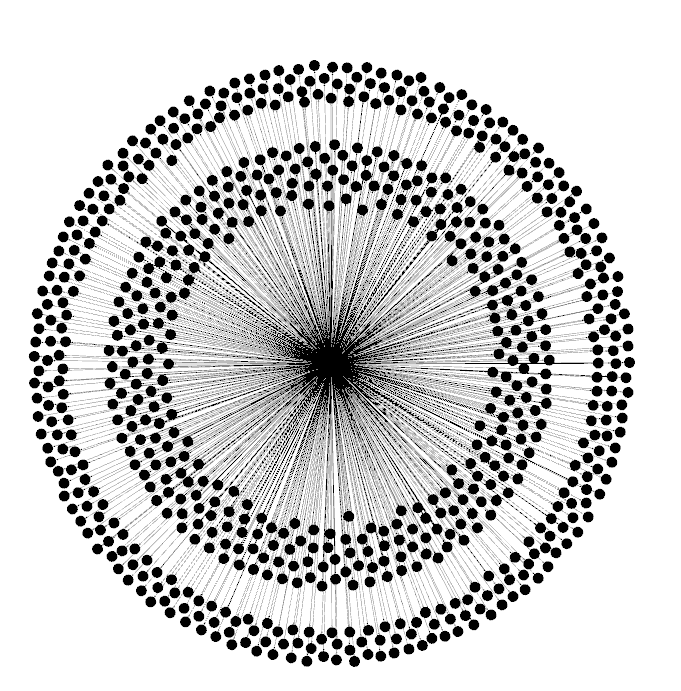

De binnenste ring duidt op een dubbele relatie. Guido Gezelle is gekoppeld aan de persoon, én de persoon is gekoppeld aan de persoon. De buitenste ring heeft slechts een enkele ipv wederkerige relatie. Dit toont daarmee ook de assymetrische relaties die zijn ingegeven in Wikidata.

**Grootte en kleur**

Vervolgens kunnen we enkele zaken aanpassen qua kleur en grootte. Via het menu 'appearance' kun je de kleur van de nodes aanpassen door ze te sorteren op een attribuut. Klik op het verfsymbooltje, daarna op 'nodes' en vervolgens op 'partition'. In dit geval kiezen we voor 'specifictype', dat de rol van de relatie weergeeft. We krijgen nu een kleurweergave van de knopen. Op dezelfde manier kunnen de verbindingen gekleurd worden op basis van hun eigenschap in het databestand, in dit geval 'RelatieItemLabel'.

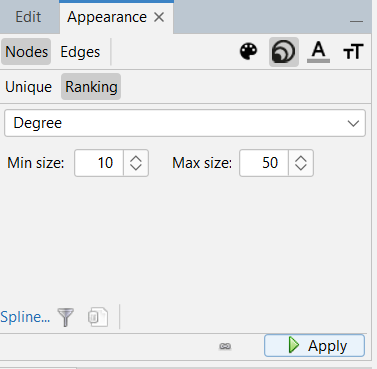

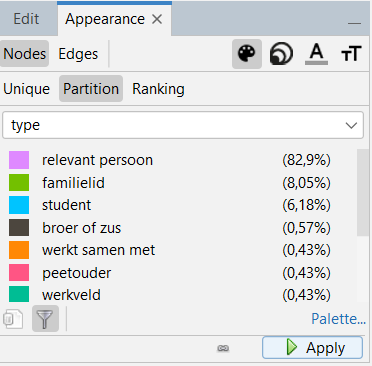

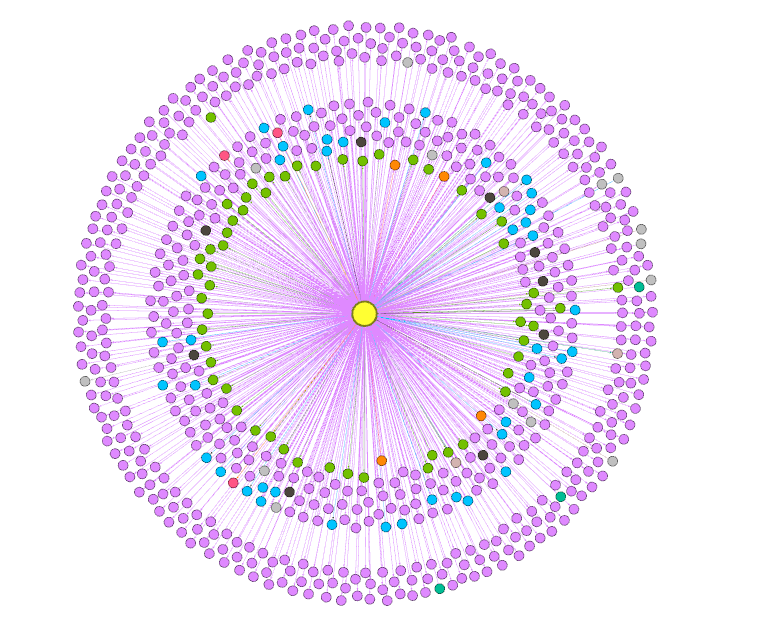

Indien gewenst, kan de centrale knoop van Guido Gezelle groter gemaakt worden door ze te selecteren met het 'vraagteken-cursor'-symbool en in het menu links de 'size' aan te passen, bv naar waarde '50' in plaats van '10'. Ook de kleur kan hier aangepast, om bijvoorbeeld een unieke kleur voor de knoop te hebben.

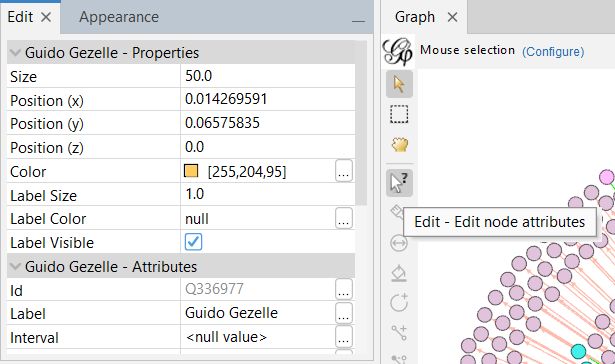

**Curved edges**

in het hoofdmenu kan naast 'overview' en 'data laboratory' ook gekozen worden voor een 'preview'-menu. Hier kan nog vanalles aangepast worden aan het model. in het bijzonder kun je hier kiezen voor 'curved' in plaats van 'straight' edges. Ook de dikte van de edges kan hier bijvoorbeeld aangepast worden, alsook of labels zichtbaar zijn, lettertypes, enzovoort.

**Labels**

Tot slot kunnen we ook nog de labels aanpassen. Hiervoor kunnen we zowel in het 'overview' of 'preview'-menu te werk gaan. Als we in het 'overview'-menu kijken, kunnen we onder de visualisatie enkele paramaters vinden. Hier kunnen we ook meer opties openen.

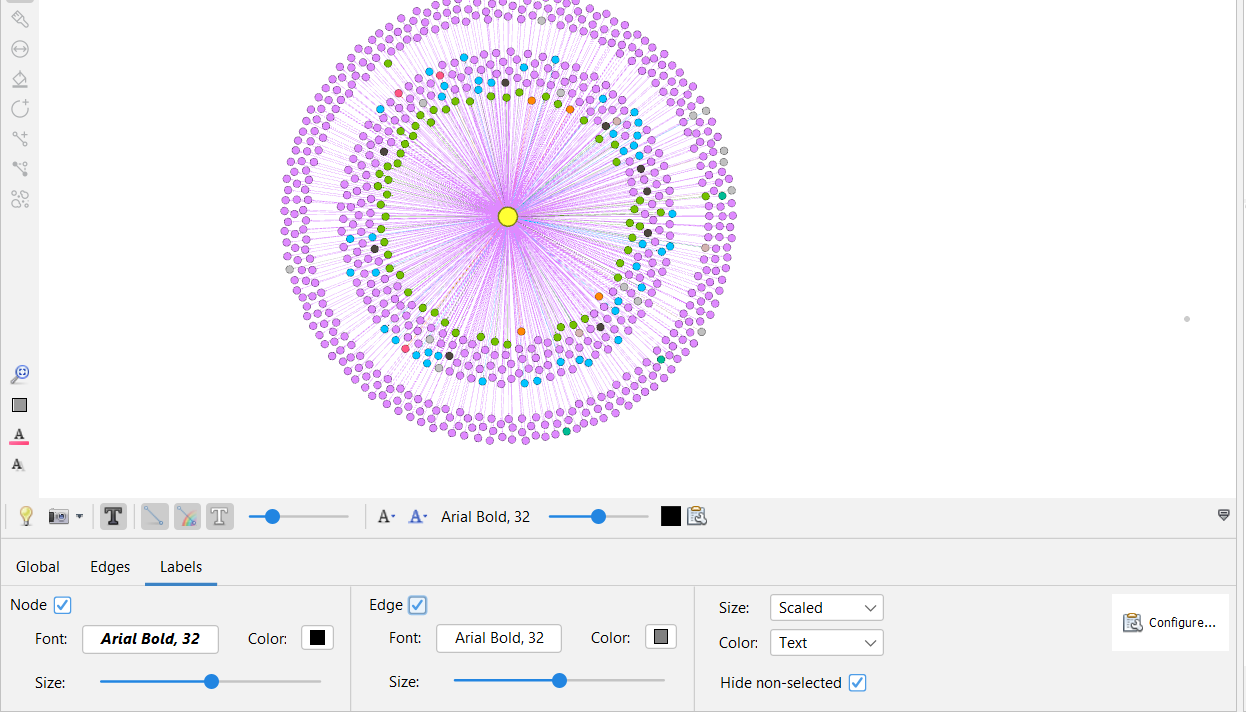

Omdat we enkel de labels willen zien van geselecteerde knopen, kiezen we graag voor 'hide non-selected'. Daarnaast kan hier ook het lettertype en de grootte gekozen worden. We hebben graag een gelijke grootte voor alle labels. Daarvoor pas je 'size: scaled' aan naar 'fixed'.

opmerking: Uiteindelijk werd mogelijk voor andere kleuren gekozen in de finale weergave. Deze kunnen eenvoudig aangepast worden in de interface van Gephi. Ook de weergave kan er net iets anders uitzien. Dit komt omdat de dataset in tussentijd werd aangepast. Soms hebben we nog enkele foutjes gecorrigereerd die niet altijd zijn opgenomen in de uitgebreide handleiding.

**Importeren nieuw bestand met nodes of edges**

Als je later toch de data van de nodes of edges wil aanpassen in de originele spreadsheets, kun je de aangepaste versies eenvoudig opnieuw downloaden vanuit Excel of Google Spreadsheets en inladen via 'Data Laboratory'-'import spreadsheet' in Gephi. Je kan daarvoor eerst alle nodes of edges selecteren (ctrl+a) in Gephi en dan verwijderen. Vervolgens kun je de nieuwe set selecteren en inladen, zoals je deed na de opstart van Gephi.

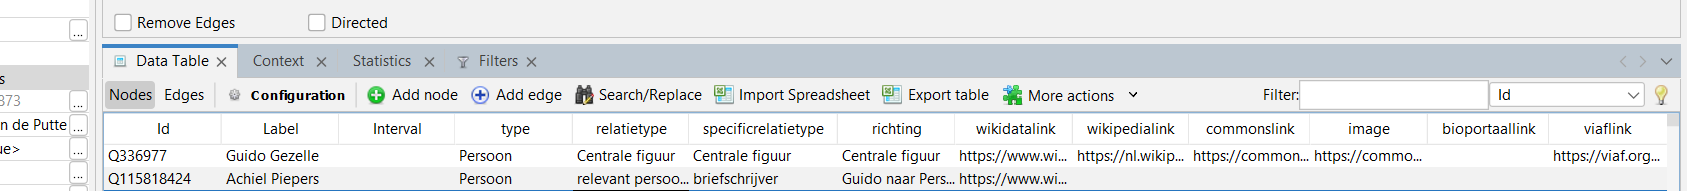

##EXPORTEREN MET SIGMA

Nu enkele aanpassingen zijn gebeurd qua layout via Gephi, zullen we de visualisatie exporteren en klaarmaken om op interactieve manier online te plaatsen. In dit geval zullen we gebruik maken van de plugin Sigma. Deze is geintegreerd in Gephi en kan op eenvoudige wijze geactiveerd en gebruikt worden. Andere plugins kunnen gebruikt worden, of indien je wat kunt programmeren is html en java ook een oplossing. In een van de andere visualisaties (zie andere hoofdstukken) maken we een plugin/interface met behulp van Gemini 3.0.

Hier tonen we hoe je de plugin installeert. Daarna tonen we hoe je aanpassingen maakt voor de instellingen van de export.
Eerst ga je naar tools in het hoofdmenu (bovenaan), daarna klik je op plugin. In de interface zoek je naar Sigma Exporter. Je installeert die en drukt op 'active'. Eens geactiveerd, moet je Gephi herstarten om de plugin te laten werken. Na heropstart kan je je project exporteren.



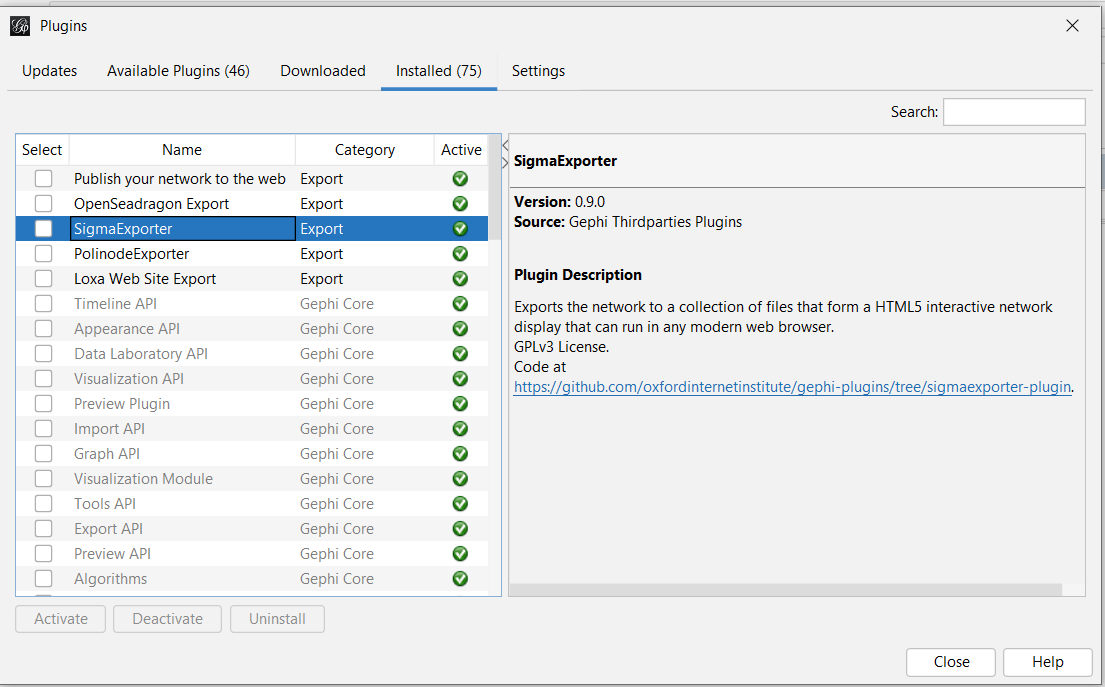

Vervolgens kan er geëxporteerd worden via Sigma. Dit kan door in het hoofdmenu bovenaan naar 'file' te navigeren en dan te kiezen voor 'export' en vervolgens 'sigma.js template'. Je krijgt dan dit menu te zien:

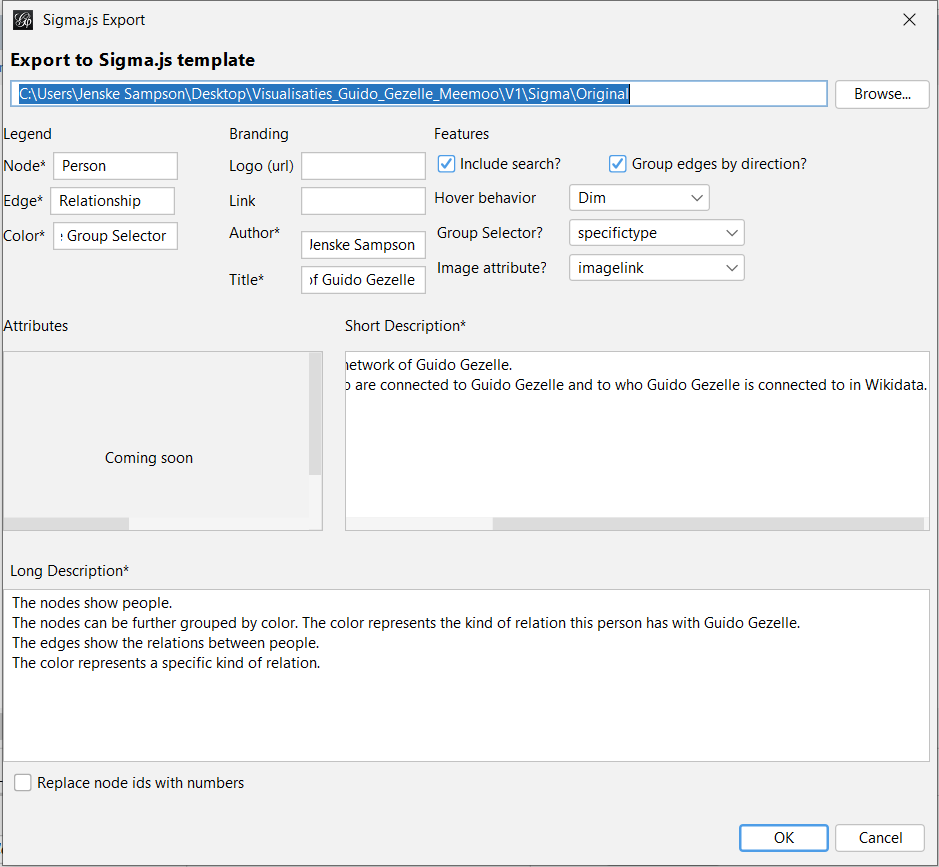

Er kan uitleg geplaatst worden bij de nodes en edges. Hier geven we aan dat node een 'persoon' representeert. In de korte beschrijving kan meer uitleg geplaatst worden. Deze is beperkt door de ruimte die ze onmiddellijk inneemt op het scherm. Een interessante functie die ingesteld kan worden is de 'group selector'. Hier kan een indeling op basis van een attribuut gemaakt worden. In dit geval kiezen we voor het specifieke type van de persoon, bv relevant persoon, vertaler, broer of zus, familielid, enzovoort. Sigma kan ook een foto linken en tonen per knoop. Hiervoor linken we de kolom imagelink aan 'image attribute'. Tot slot kan er ook een uitvoerige uitleg bijgevoegd worden. Deze wordt zichtbaar in een popup-venster, waardoor de lengte veel meer kan zijn en niet in strijd komt met het zichtbare netwerk en de rest van de interface.

Eens we de visualisatie opladen via Github (zie verder), zal dit er ongeveer zo uitzien:

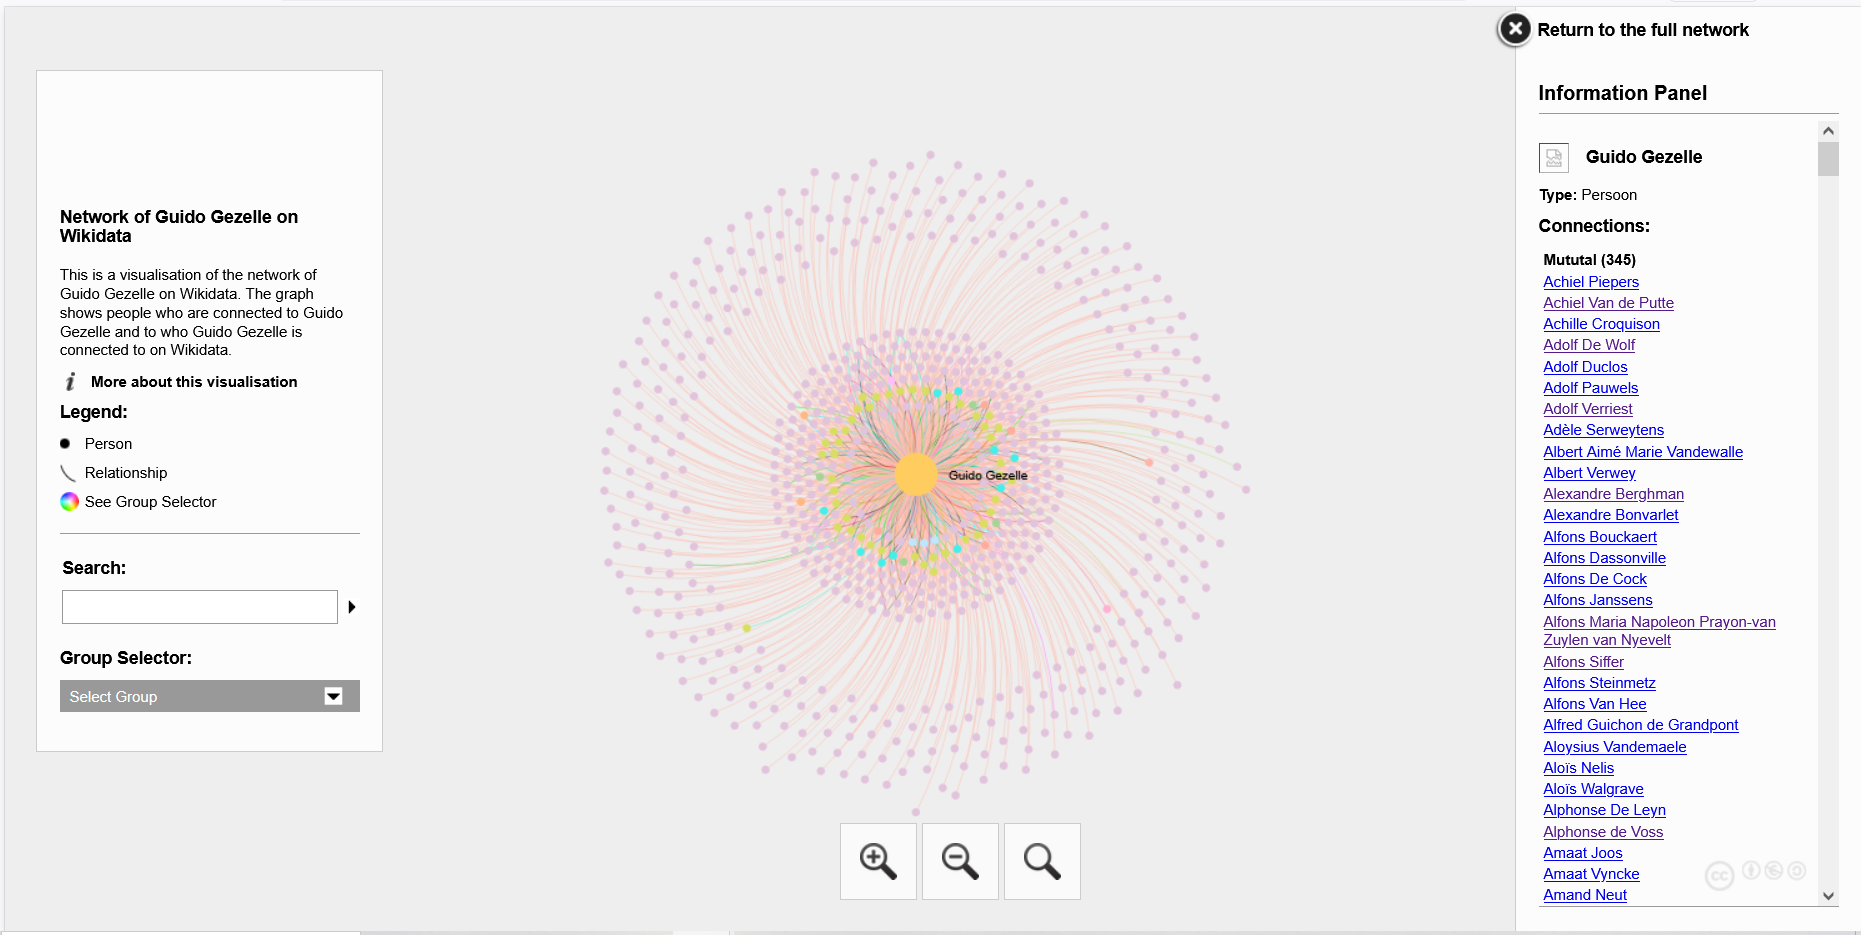

## GITHUB

Vervolgens willen we deze visualisatie interactief kunnen aanbieden op een website. Via Github kunnen deze documenten opladen en omzetten in een webpagina. Op zich is dit niet erg moeilijk eens men een account heeft op Github. Eerst en vooral moet er een repository gemaakt worden. Dit repository kan vervolgens omgezet worden tot een Github-page. Via de link naar de page krijg je de visualisatie te zien.

**Repository**

Eerst en vooral maak je dus een nieuw repository aan op Github. Geef het een toepasselijke naam, bv 'VisualisatieGezelle1'. Vervolgens wordt de map met bestanden die werd klaargemaakt door Sigma hierin opgeladen.
Opmerking: het is belangrijk de inhoud van de map 'network' te kopiëren. De map 'network' zelf wordt niet mee gekopieerd. in dit geval zijn dit ongeveer 33 bestanden.

Klik op 'add files/upload new files'. Dit lukt mogelijk enkel in Chrome. Sommige browsers nemen niet alle bestanden over. Eens het opladen klaar is, kan je op 'commit' drukken. De bestanden zitten nu in het repository

**Github page**

Nu zullen we van het repository een webpagina maken. Daarvoor klikken we op het 'repository' en gaan vervolgens naar de 'settings'. Daar kiezen we voor 'pages'. Onder 'build and deployment' selecteer je 'main' als branch en in het vak ernaast voor 'root'. Klik vervolgens op 'save'. Wacht enkele minuten en herlaad de pagina. Je zult nu een link te zien krijgen waarop de webpagina te bekijken is:

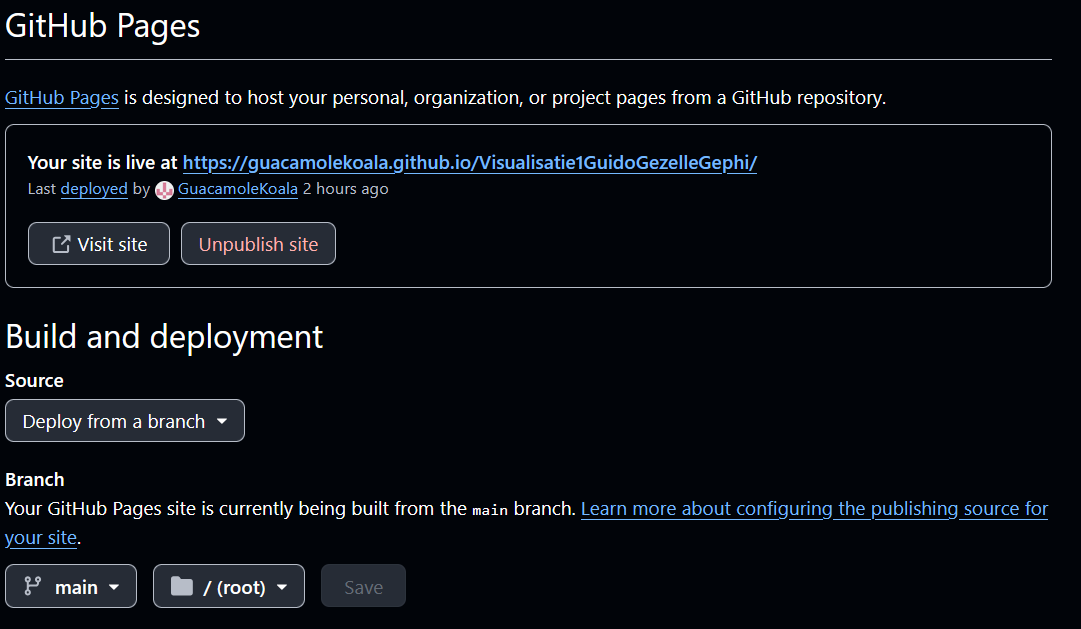

**Version control**

Je kan de code die opgeladen is, ook makkelijk aanpassen via het platform via Github. Op die manier kan je ook een controle/geschiedenis opbouwen aan veranderingen in je code. Op die manier kan je ook terugkeren naar een eerder moment, moest er iets fout lopen.

Opmerking:
Op elk moment kan de dataset aangepast worden door op github naar het bestand 'data.json' te gaan en dit te vervangen door een nieuwe export vanuit Gephi (of elders).
De titel, korte en uitgebreide beschrijving, enzovoort kunnen eenvoudig aangepast worden in het config.json of index.html via Github of een andere editor.
Ook de algemene werking van de interface kan aangepast worden via het main.js- bestand. Ook dit kan vervangen worden of aangevuld worden waar nodig met nieuwe code.

**Code aanpassen op Github:**



Je kan code van de bestanden gemakkelijk aanpassen via Github. Ga daarvoor naar de repository die je eerder hebt gemaakt en bekijk de bestanden door erop te klikken.

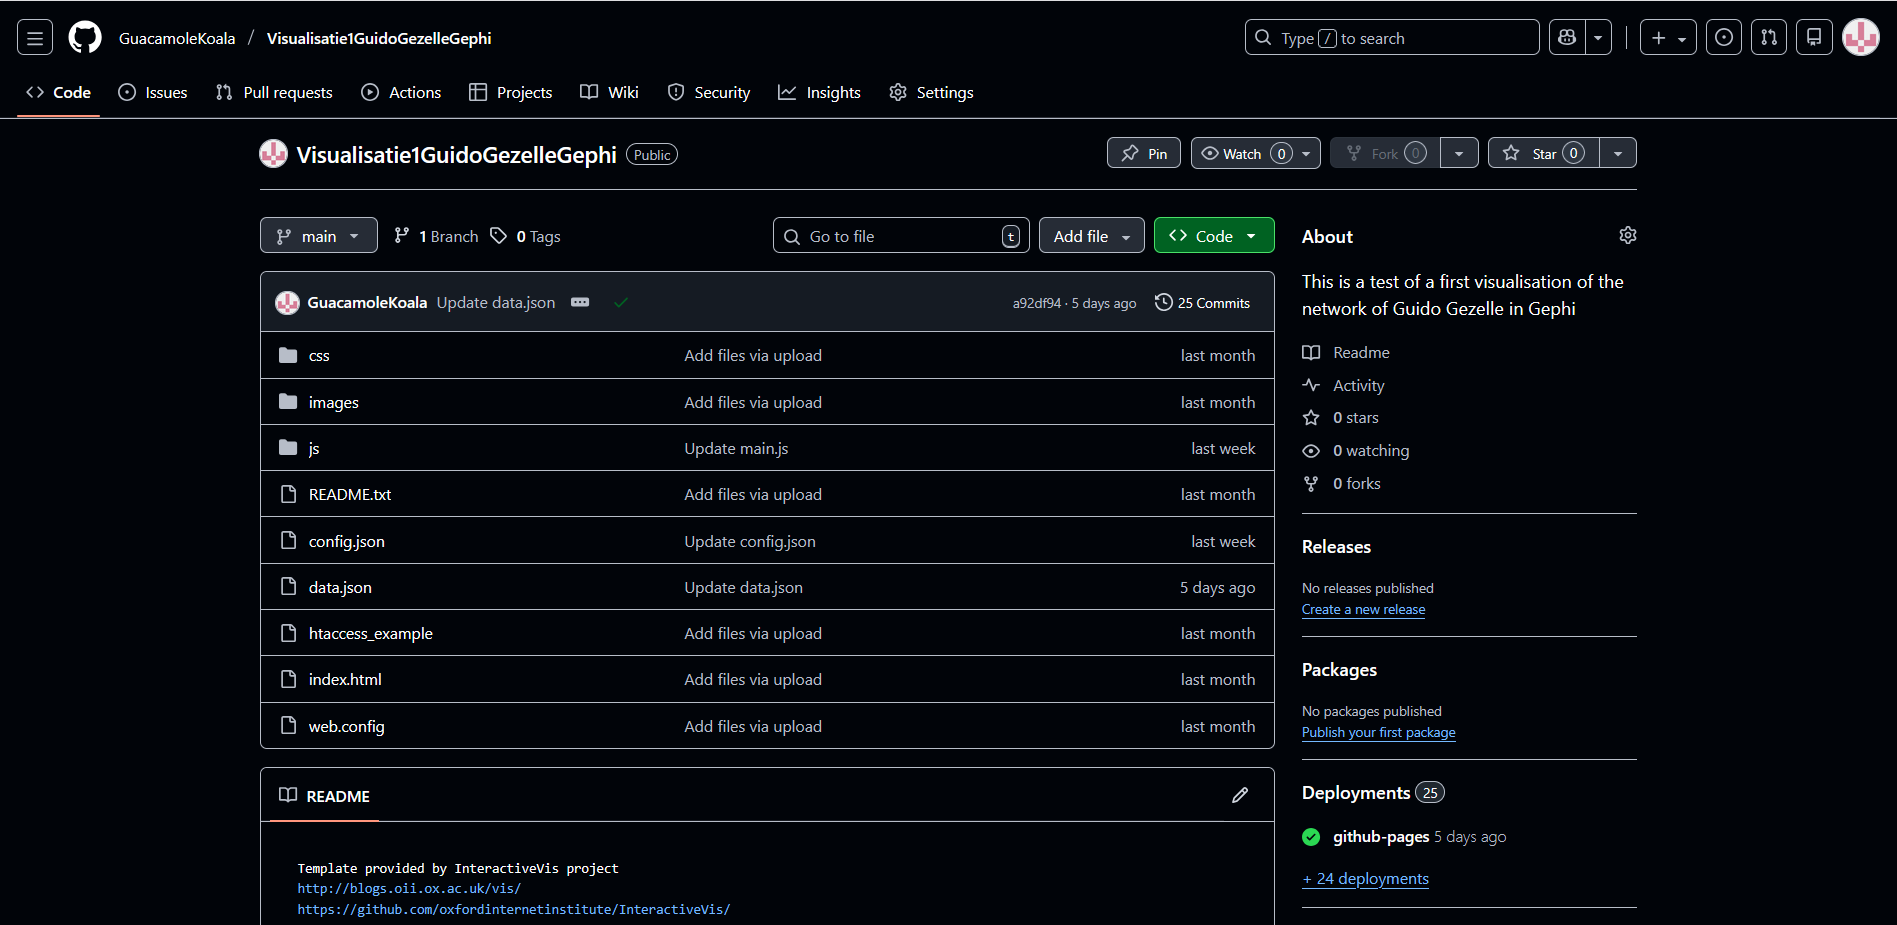

Als je rechts op het potlood-icoontje klikt, kun je de code direct aanpassen.

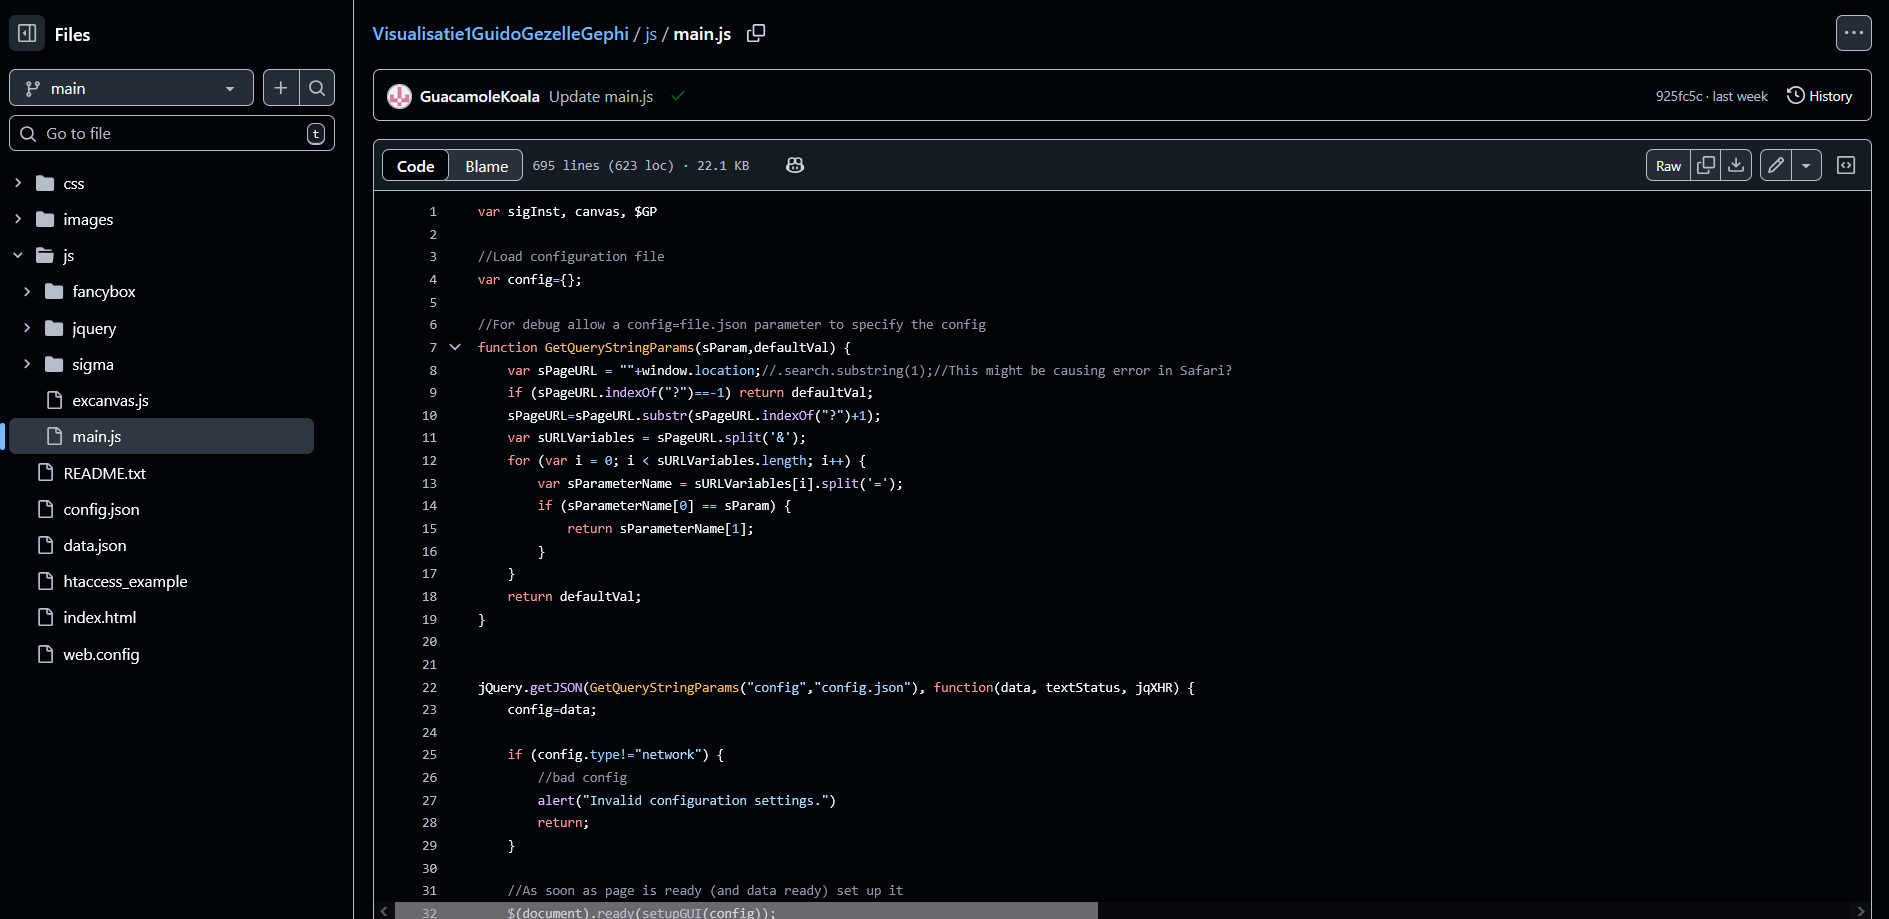

Na de aanpassingen druk je op 'commit changes'. Hier kun je ook een nota toevoegen van wat je precies hebt gedaan of verbeterd. Dit is belangrijk voor de controle van versies, indien er iets misgaat bijvoorbeeld.

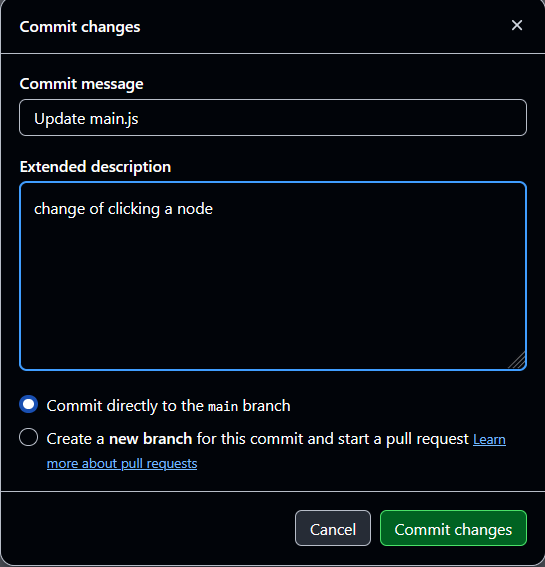

Na een paar minuten kun je de aanpassingen zien op de webpagina. Soms moet je opletten dat de browser niet een oude versie blijft herladen (door cache of cookies). Een optie is om even te wachten of in tussentijd een andere browser te proberen.

##AANPASSEN SCRIPT



Omdat de Sigma-interface nog niet optimaal was voor mijn visualisaties, zijn we aan de slag gegaan om de code van de interface wat aan te passen. Opmerking: bij deze stap hebben we uitvoerig gebruik gemaakt van generatieve AI, in het bijzonder Gemini 2.5. Via de juiste prompts kan Gemini helpen om de code aan te passen en gewenste resultaten te bereiken.

In de Sigma-export moeten enkele zaken aangepast worden in de files met de naam 'config.json', 'main.js' en index.html.
Hieronder lichten we kort toe welke aanpassingen we hebben gedaan.

1) In het infopaneel aan de rechtkant staat momenteel 'information pane'. We willen dit aanpassen naar 'information panel'. Daarnaast willen we na de export evt ook nog enkele tekstaanpassingen maken in de titel, beschrijving, enzovoort.

2) De verbindingen/edges moeten dikker zichtbaar worden, want momenteel zijn ze te dun, zeker bij het inzoomen.

3) Eerst en vooral willen we dat de visualisatie meer informatie toont als we op een knoop klikken. Daarvoor open momenteel een paneel aan de rechterkant. Hier willen we verschillende velden als attributen zien, in dit geval de het type knoop (bv. persoon) en relatietype (soort persoon, bv relevant persoon), alsook specifieke relatietype (bv. correspondent). link naar wikidata, wikipedia, wikicommons en de afbeelding.

4) De group selector in het linkerpaneel moet verbeterd worden. Momenteel toont die 'group 1', 'group 2', enzoverder, in plaats van de respectievelijke namen van de soorten persoon (relatietype).

5) De foto's moeten kleiner getoond worden. Momenteel is dat heel groot en daardoor ook niet helemaal zichtbaar in het rechtpaneel na het klikken op een knoop.





###**1. Typfout in 'information panel'**:

het eerste probleem is simpel op te lossen door in de index.html te zoeken naar 'information pane' en deze simpelweg aan te passen naar 'information panel'. Vervolgens kun je het bestanden opnieuw opladen.

###**2. Grootte van de verbindingen**:

Het tweede vraagstuk is eenvoudig op te lossen door naar config.json te gaan en volgende waarden aan te passen:

```
"maxEdgeSize": 1.5,
"minEdgeSize": 1.5,
"minNodeSize": 2,
"maxNodeSize": 10
```

In dit geval hebben we de waarden van de knopen (nodes) en verbindingen (edges) verhoogd.

###**3. Meer informatie in een knoop en specifiek geordend**:  

Dit is op te lossen door aanpassingen te maken in de main.js. Na enkele prompts met deze vraag aan Gemini kwamen we samen tot een oplossing. In dit geval moet vooral gekeken worden naar de code die in de nodesActive. Hier wordt de weergave van de verschillende attributen aangepast. Met hulp van Gemini passen we de code aan zodat eerst type (bv person), dan relatietype (bv relevant persoon), dan specificrelatietype (bv correspondent) getoond worden. Daarna willen we de wikidata, wikipedia, wikicommons en viaf link, alsook een link naar de foto.

oude code (mogelijk kleine variaties):

```
// OUDE CODE, VOOR DE WIJZIGINGEN

function nodeActive(a) {
    sigInst.neighbors = {};
    sigInst.detail = !0;
    var b = sigInst._core.graph.nodesIndex[a];
    showGroups(!1);
    sigInst.iterEdges(function (a) {
        a.attr.lineWidth = !1;
        a.hidden = !0;
        var b = sigInst._core.graph.nodesIndex[a.source];
        b.label != sigInst._core.graph.nodesIndex[a.target].label && (a.hidden = !1, sigInst.neighbors[a.source] != b.label && sigInst.neighbors[a.target] != b.label && (a.attr.color = "rgba(0, 0, 0, 1)"), sigInst.neighbors[a.source] = b.label, sigInst.neighbors[a.target] = b.label)
    });
    var f = [];
    sigInst.iterNodes(function (a) {
        a.hidden = !0;
        a.attr.lineWidth = !1;
        a.attr.color = a.color
    });
    for (var e = [], c = sigInst.neighbors, g; g in c) {
        var d = sigInst._core.graph.nodesIndex[g];
        d.hidden = !1;
        d.attr.lineWidth = !1;
        d.attr.color = d.color;
        a != g && e.push({
            id: g,
            name: d.label
        })
    }
    e.sort(function (a, b) {
        a = a.name.toLowerCase();
        b = b.name.toLowerCase();
        return a < b ? -1 : a > b ? 1 : 0
    });
    for (g in e) c = e[g], f.push('<li class="membership"><a href="#' + c.name + '" onmouseover="sigInst._core.plotter.drawHoverNode(sigInst._core.graph.nodesIndex[\'' + c.id + '\'])\" onclick=\"nodeActive(\'' + c.id + '\')" onmouseout="sigInst.refresh()">' + c.name + "</a></li>");
    b.hidden = !1;
    b.attr.color = b.color;
    b.attr.lineWidth = 6;
    b.attr.strokeStyle = "#000000";
    sigInst.draw(2, 2, 2, 2);
    $GP.info_link.find("ul").html(f.join(""));
    $GP.info_link.find("li").each(function () {
        var a = $(this),
            b = a.attr("rel")
    });
    f = b.attr;
    if (f.attributes) {
        var image_attribute = false;
        if (config.informationPanel.imageAttribute) {
            image_attribute=config.informationPanel.imageAttribute;
        }
        var e = [],
            c;
        for (c in f.attributes) {
            var g = c,
                d = f.attributes[c];
            if(d != 'null' && d != null && d.trim().length > 0) {
            e.push("<span><strong>" + g + ":</strong> " + d + "</span>")
            }
        }
        if (image_attribute) {
            //image_index = jQuery.inArray(image_attribute, temp_array);
            $GP.info_name.html("<div><img src=" + f.attributes[image_attribute] + " style=\"vertical-align:middle; max-height:60px; max-width:60px; margin-right: 10px;\" /> <span onmouseover=\"sigInst._core.plotter.drawHoverNode(sigInst._core.graph.nodesIndex['" + b.id + '\'])" onmouseout="sigInst.refresh()">' + b.label + "</span></div>");
        } else {
            $GP.info_name.html("<div><span onmouseover=\"sigInst._core.plotter.drawHoverNode(sigInst._core.graph.nodesIndex['" + b.id + '\'])" onmouseout="sigInst.refresh()">' + b.label + "</span></div>");
        }
        // Image field for attribute pane
        $GP.info_data.html(e.join("<br/>"))
    }
    $GP.info_data.show();
    $GP.info_p.html("Connections:");
    $GP.info.animate({width:'show'},350);
	$GP.info_donnees.hide();
	$GP.info_donnees.show();
    sigInst.active = a;
    window.location.hash = b.label;
}
```



Nieuwe code

In [ ]:
/**
 * AANGEPASTE VERSIE VAN nodeActive(a) - STRIKTE VOLGORDE EN JUISTE CASE-SENSITIVE ATTRIBUTEN
 */
function nodeActive(a) {

	var groupByDirection=false;
	if (config.informationPanel.groupByEdgeDirection && config.informationPanel.groupByEdgeDirection==true)	groupByDirection=true;

    sigInst.neighbors = {};
    sigInst.detail = !0;
    var b = sigInst._core.graph.nodesIndex[a];
    showGroups(!1);
	var outgoing={},incoming={},mutual={};//SAH
    sigInst.iterEdges(function (b) {
        b.attr.lineWidth = !1;
        b.hidden = !0;

        n={
            name: b.label,
            colour: b.color
        };

   	   if (a==b.source) outgoing[b.target]=n;		//SAH
	   else if (a==b.target) incoming[b.source]=n;		//SAH
       if (a == b.source || a == b.target) sigInst.neighbors[a == b.target ? b.source : b.target] = n;
       b.hidden = !1, b.attr.color = "rgba(0, 0, 0, 1)";
    });
    var f = [];
    sigInst.iterNodes(function (a) {
        a.hidden = !0;
        a.attr.lineWidth = !1;
        a.attr.color = a.color
    });

    if (groupByDirection) {
		//SAH - Compute intersection for mutual and remove these from incoming/outgoing
		for (e in outgoing) {
			//name=outgoing[e];
			if (e in incoming) {
				mutual[e]=outgoing[e];
				delete incoming[e];
				delete outgoing[e];
			}
		}
    }

    var createList=function(c) {
        var f = [];
    	var e = [],
      	 	 //c = sigInst.neighbors,
       		 g;
    for (g in c) {
        var d = sigInst._core.graph.nodesIndex[g];
        d.hidden = !1;
        d.attr.lineWidth = !1;
        d.attr.color = c[g].colour;
        a != g && e.push({
            id: g,
            name: d.label,
            group: (c[g].name)? c[g].name:"",
            colour: c[g].colour
        })
    }
    e.sort(function (a, b) {
        var c = a.group.toLowerCase(),
            d = b.group.toLowerCase(),
            e = a.name.toLowerCase(),
            f = b.name.toLowerCase();
        return c != d ? c < d ? -1 : c > d ? 1 : 0 : e < f ? -1 : e > f ? 1 : 0
    });
    d = "";
		for (g in e) {
			c = e[g];
			/*if (c.group != d) {
				d = c.group;
				f.push('<li class="cf" rel="' + c.color + '"><div class=""></div><div class="">' + d + "</div></li>");
			}*/
			f.push('<li class="membership"><a href="#' + c.name + '" onmouseover="sigInst._core.plotter.drawHoverNode(sigInst._core.graph.nodesIndex[\'' + c.id + '\'])\" onclick=\"nodeActive(\'' + c.id + '\')" onmouseout="sigInst.refresh()">' + c.name + "</a></li>");
		}
		return f;
	}


	var f=[];

	if (groupByDirection) {
		size=Object.size(mutual);
		f.push("<h2>Mututal (" + size + ")</h2>");
		(size>0)? f=f.concat(createList(mutual)) : f.push("No mutual links<br>");
		size=Object.size(incoming);
		f.push("<h2>Incoming (" + size + ")</h2>");
		(size>0)? f=f.concat(createList(incoming)) : f.push("No incoming links<br>");
		size=Object.size(outgoing);
		f.push("<h2>Outgoing (" + size + ")</h2>");
		(size>0)? f=f.concat(createList(outgoing)) : f.push("No outgoing links<br>");
	} else {
		f=f.concat(createList(sigInst.neighbors));
	}
	//b is object of active node -- SAH
    b.hidden = !1;
    b.attr.color = b.color;
    b.attr.lineWidth = 6;
    b.attr.strokeStyle = "#000000";
    sigInst.draw(2, 2, 2, 2);

    $GP.info_link.find("ul").html(f.join(""));
    $GP.info_link.find("li").each(function () {
        var a = $(this),
            b = a.attr("rel");
    });
    f = b.attr;
    if (f.attributes) {
		var image_attribute = false;
		if (config.informationPanel.imageAttribute) {
			image_attribute=config.informationPanel.imageAttribute;
		}

		// --- START CUSTOMIZATIONS (Aangepaste attributen weergave) ---
		var e = [];

        // Functie om de waarde op te halen, onafhankelijk van de GEXF-structuur
		var getAttrValue = function(key) {
		    if (Array.isArray(f.attributes)) {
		        for (var i = 0; i < f.attributes.length; i++) {
		            if (f.attributes[i].attr === key) {
		                return f.attributes[i].val;
		            }
		        }
		        return null;
		    } else {
		        // HIER WAS HET CASE SENSITIVE PROBLEEM. DE KEYS WORDEN NU CORRECT IN KLEINE LETTERS OPGEVRAAGD.
		        return f.attributes[key];
		    }
		}

        // Haal de kernvelden op met correcte kleine letters (zoals in uw JSON)
        var mainRelation = getAttrValue('relatietype');
        var specificRelation = getAttrValue('specificrelatietype'); // FIXED: lowercase key

		// 1. TYPE: Eerst Type
		var attrType = getAttrValue('type'); // FIXED: lowercase key
		if (attrType && attrType.toLowerCase() !== 'null' && attrType.trim().length > 0) {
			e.push('<span><strong>Type:</strong> ' + attrType + '</span>');
		}

		// 2. RELATIETYPE: Dan Relatietype
		if (mainRelation && mainRelation.toLowerCase() !== 'null' && mainRelation.trim().length > 0) {
			e.push('<span><strong>Relatietype:</strong> ' + mainRelation + '</span>');
		}

		// 3. SPECIFICRELATIETYPE: Dan Specific Relatietype
		if (specificRelation && specificRelation.toLowerCase() !== 'null' && specificRelation.trim().length > 0) {
			e.push('<span><strong>Specific Relatietype:</strong> ' + specificRelation + '</span>');
		}

        // RICHTING is nu NIET meer opgenomen, zoals gevraagd.

		// --- LINKS (Strikte Volgorde) ---
		// De keys hier zijn ook gecorrigeerd naar kleine letters om te matchen met de JSON
		var linkAttributes = [
			{ key: 'wikidatalink', label: 'Wikidata Link' }, // FIXED: lowercase key
			{ key: 'wikipedialink', label: 'Wikipedia Link' }, // ASSUMED/FIXED: lowercase key
			{ key: 'commonslink', label: 'Wikicommons Link' }, // ASSUMED/FIXED: lowercase key
            { key: 'viaflink', label: 'VIAF Link' }, // ASSUMED/FIXED: lowercase key
			{ key: 'image', label: 'Afbeelding Link' }
		];

		for (var i = 0; i < linkAttributes.length; i++) {
			var attrConfig = linkAttributes[i];
			var linkKey = attrConfig.key;
			var linkValue = getAttrValue(linkKey);

			if (linkValue && linkValue.toLowerCase() !== 'null' && linkValue.trim().length > 0) {
				var h = '<span><strong>' + attrConfig.label + ':</strong> <a href="' + linkValue + '" target="_blank">' + linkValue + '</a></span>';
				e.push(h);
			}
		}

		// --- END CUSTOMIZATIONS ---

		var imageValue = getAttrValue(image_attribute);
		if (image_attribute && imageValue) {
			$GP.info_name.html("<div><img src=" + imageValue + " style=\"vertical-align:middle; max-height:60px; max-width:60px; margin-right: 10px;\" /> <span onmouseover=\"sigInst._core.plotter.drawHoverNode(sigInst._core.graph.nodesIndex['" + b.id + '\'])" onmouseout="sigInst.refresh()">' + b.label + "</span></div>");
		} else {
			$GP.info_name.html("<div><span onmouseover=\"sigInst._core.plotter.drawHoverNode(sigInst._core.graph.nodesIndex['" + b.id + '\'])" onmouseout="sigInst.refresh()">' + b.label + "</span></div>");
		}
		// Image field for attribute pane
		$GP.info_data.html(e.join("<br/>"))
    }
    $GP.info_data.show();
    $GP.info_p.html("Connections:");
    $GP.info.animate({width:'show'},350);
	$GP.info_donnees.hide();
	$GP.info_donnees.show();
    sigInst.active = a;
    window.location.hash = b.label;
}

// ... (Rest van de code is ongewijzigd)

###**4. Groepenselector aanpassen**:

Dit was een complexer probleem, in de zin dat het langer duurde om een oplossing te vinden. Om de groepen van de selector te linken aan een specifiek attribuut, in dit geval de specificrelationtype, moet de code aangepast worden.

Dit is de volledige uitschrijving van de codeblokken die de verbetering in de groepsselector (a.clusters en a.clusterNames) aantonen, met de focus op de functies initSigma en configSigmaElements.

*A. Dataverzameling in initSigma*

Dit blok toont hoe de nieuwe code een extra object (a.clusterNames) gebruikt om de specifieke groepsnaam (afkomstig van een attribuut in de data) te koppelen aan de kleur van de groep. De oude code gebruikte alleen de kleur voor het clusteren.

Oude Code:

JavaScript

```
// Oude versie: Dataverzameling in initSigma

    dataReady = function() {//This is called as soon as data is loaded
        a.clusters = {};

        a.iterNodes(
            function (b) { //This is where we populate the array used for the group select box

                // ...
                a.clusters[b.color] || (a.clusters[b.color] = []);
                a.clusters[b.color].push(b.id);//SAH: push id not label
            }
        
        );
    // ...
    }
```




Nieuwe Code:

JavaScript

```
// Nieuwe versie: Dataverzameling in initSigma (met clusterNames)

    dataReady = function() {//This is called as soon as data is loaded
        a.clusters = {};
        **a.clusterNames = {}; // NEW: object to map color to the group attribute name**
        
        **var groupAttrKey = config.features.groupSelectorAttribute; // e.g., "specifictype"**

        a.iterNodes(
            function (b) { //This is where we populate the array used for the group select box

                // ...
                a.clusters[b.color] || (a.clusters[b.color] = []);
                a.clusters[b.color].push(b.id);//SAH: push id not label

                **// NEW: Populate clusterNames with the group name for display**
                **var groupName = b.attr.attributes[groupAttrKey];**
                **if (groupName) {**
                    **a.clusterNames[b.color] = groupName; // Map color to group name**
                **}**
            }
        
        );
    // ...
    }

```

*B. UI Constructie in configSigmaElements*

Dit blok toont hoe de verzamelde groepsnamen worden gebruikt om de lijst in de groepsselector (aan de rechterkant van het scherm) te construeren.

Oude Code:

JavaScript

```
// Oude versie: UI Constructie in configSigmaElements

    $GP.bg = $(sigInst._core.domElements.bg);
    $GP.bg2 = $(sigInst._core.domElements.bg2);
    var a = [],
        b,x=1;
        for (b in sigInst.clusters) a.push('<div style="line-height:12px"><a href="#' + b + '"><div style="width:40px;height:12px;border:1px solid #fff;background:' + b + ';display:inline-block"></div> **Group ' + (x++) + '** (' + sigInst.clusters[b].length + ' members)</a></div>');
    //a.sort();
    $GP.cluster.content(a.join(""));
    // ...
```

Nieuwe Code:

JavaScript


```
// Nieuwe versie: UI Constructie in configSigmaElements (met clusterNames)

    $GP.bg = $(sigInst._core.domElements.bg);
    $GP.bg2 = $(sigInst._core.domElements.bg2);
    var a = [],
        b,x=1;
        **// MODIFIED: Use sigInst.clusterNames to display the group attribute name**
        for (b in sigInst.clusters) {
            **var groupName = sigInst.clusterNames[b] \|\| 'Group ' + (x++);**
            a.push('<div style="line-height:12px"><a href="#' + b + '"><div style="width:40px;height:12px;border:1px solid #fff;background:' + b + ';display:inline-block"></div> ' + **groupName** + ' (' + sigInst.clusters[b].length + ' members)</a></div>');
        }
    //a.sort();
    $GP.cluster.content(a.join(""));
    // ...
```



*C. Groepsheader in showCluster*

Dit blok toont hoe de titel van het informatiepaneel wordt aangepast wanneer een groep wordt geselecteerd, zodat de werkelijke groepsnaam wordt weergegeven in plaats van alleen de kleur of een standaardtekst.

Oude Code:

JavaScript

```
// Oude versie: Groepsheader in showCluster

    // ...
        sigInst.draw(2, 2, 2, 2);
        $GP.info_name.html("<b>" + a + "</b>"); // Toont alleen de hex-kleurcode of de hash
        $GP.info_data.hide();
        $GP.info_p.html("Group Members:");
    // ...

```

Nieuwe Code:

JavaScript


```
// Nieuwe versie: Groepsheader in showCluster (met clusterNames)

    // ...
        sigInst.draw(2, 2, 2, 2);
        **// MODIFIED: Use the mapped name in the cluster header**
        $GP.info_name.html("<b>" + **(sigInst.clusterNames[a] \|\| a)** + "</b>");
        $GP.info_data.hide();
        $GP.info_p.html("Group Members:");
    // ...
```

###**5. Grootte van een afbeelding aan te passen**:

Ook hier werd hulp gevraagd aan Gemini. De grootte van de afbeelding wordt bepaald door de HTML-styling binnen de nodeActive functie in mainadj.js. We kunnen dit aanpassen door een vaste maximale hoogte of breedte in te stellen op de <img> tag. Hier is de aangepaste code die een maximale hoogte van 60 pixels instelt voor de afbeelding, waardoor deze als een thumbnail wordt weergegeven.

Zoek de regel in de sectie waar image_attribute waar is (if (image_attribute)) in mainadj.js:

JavaScript
```
// OUDE CODE (in mainadj.js - binnen if (image_attribute))

$GP.info_name.html("<div><img src=" + f.attributes[image_attribute] + " style=\"vertical-align:middle\" /> <span onmouseover=\"sigInst._core.plotter.drawHoverNode(sigInst._core.graph.nodesIndex['" + b.id + '\'])" onmouseout="sigInst.refresh()">' + b.label + "</span></div>");
```

Nieuwe Code (met vaste afmeting)

Vervang de style attribuutwaarde om een maximale hoogte in te stellen (bijvoorbeeld max-height:60px en max-width:60px om een duidelijke thumbnail te krijgen):

JavaScript:
```
// NIEUWE CODE (vervangende regel in mainadj.js)

$GP.info_name.html("<div><img src=" + f.attributes[image_attribute] + " style=\"vertical-align:middle; max-height:60px; max-width:60px; margin-right: 10px;\" /> <span onmouseover=\"sigInst._core.plotter.drawHoverNode(sigInst._core.graph.nodesIndex['" + b.id + '\'])" onmouseout="sigInst.refresh()">' + b.label + "</span></div>");
```

Opmerking:
op elk moment kan de dataset aangepast worden door op github naar het bestand 'data.json' te gaan en dit te vervangen door een nieuwe export vanuit Gephi (of elders).
De titel, korte en uitgebreide beschrijving, enzovoort kunnen eenvoudig aangepast worden in het config.json of index.html via Github of een andere editor.
Ook de algemene werking van de interface kan aangepast worden via het main.js- bestand. Ook dit kan vervangen worden of aangevuld worden waar nodig met nieuwe code.

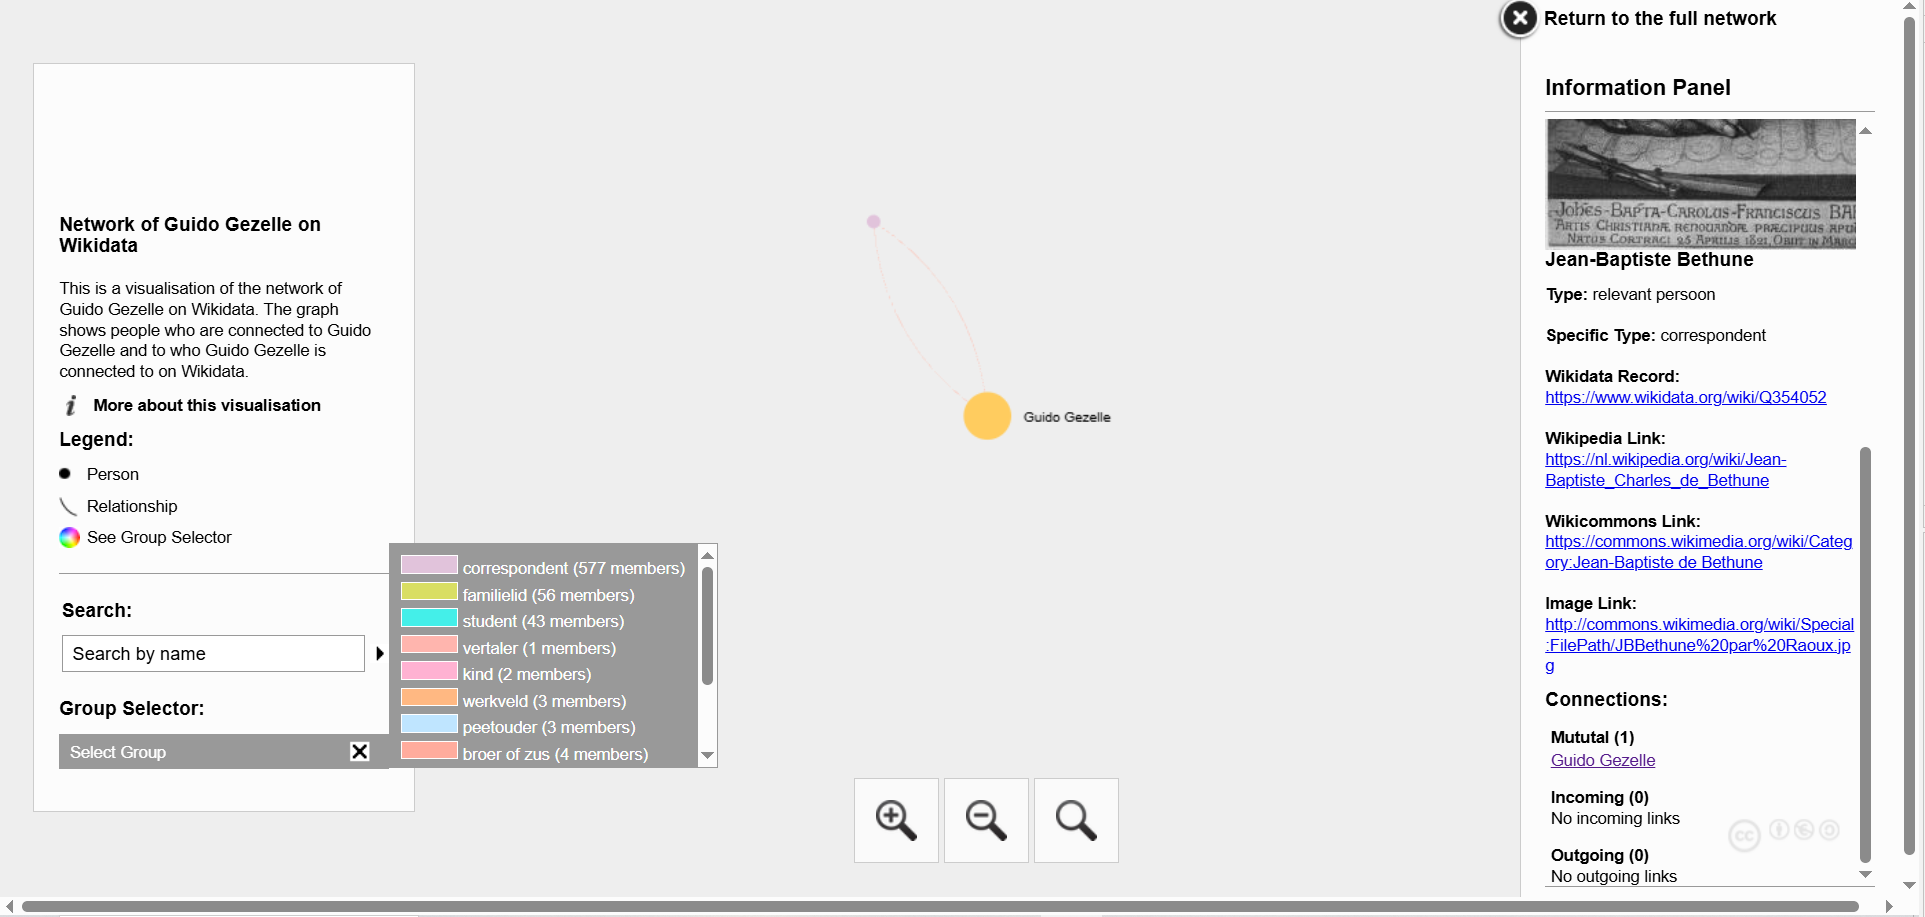

##FINAAL RESULTAAT

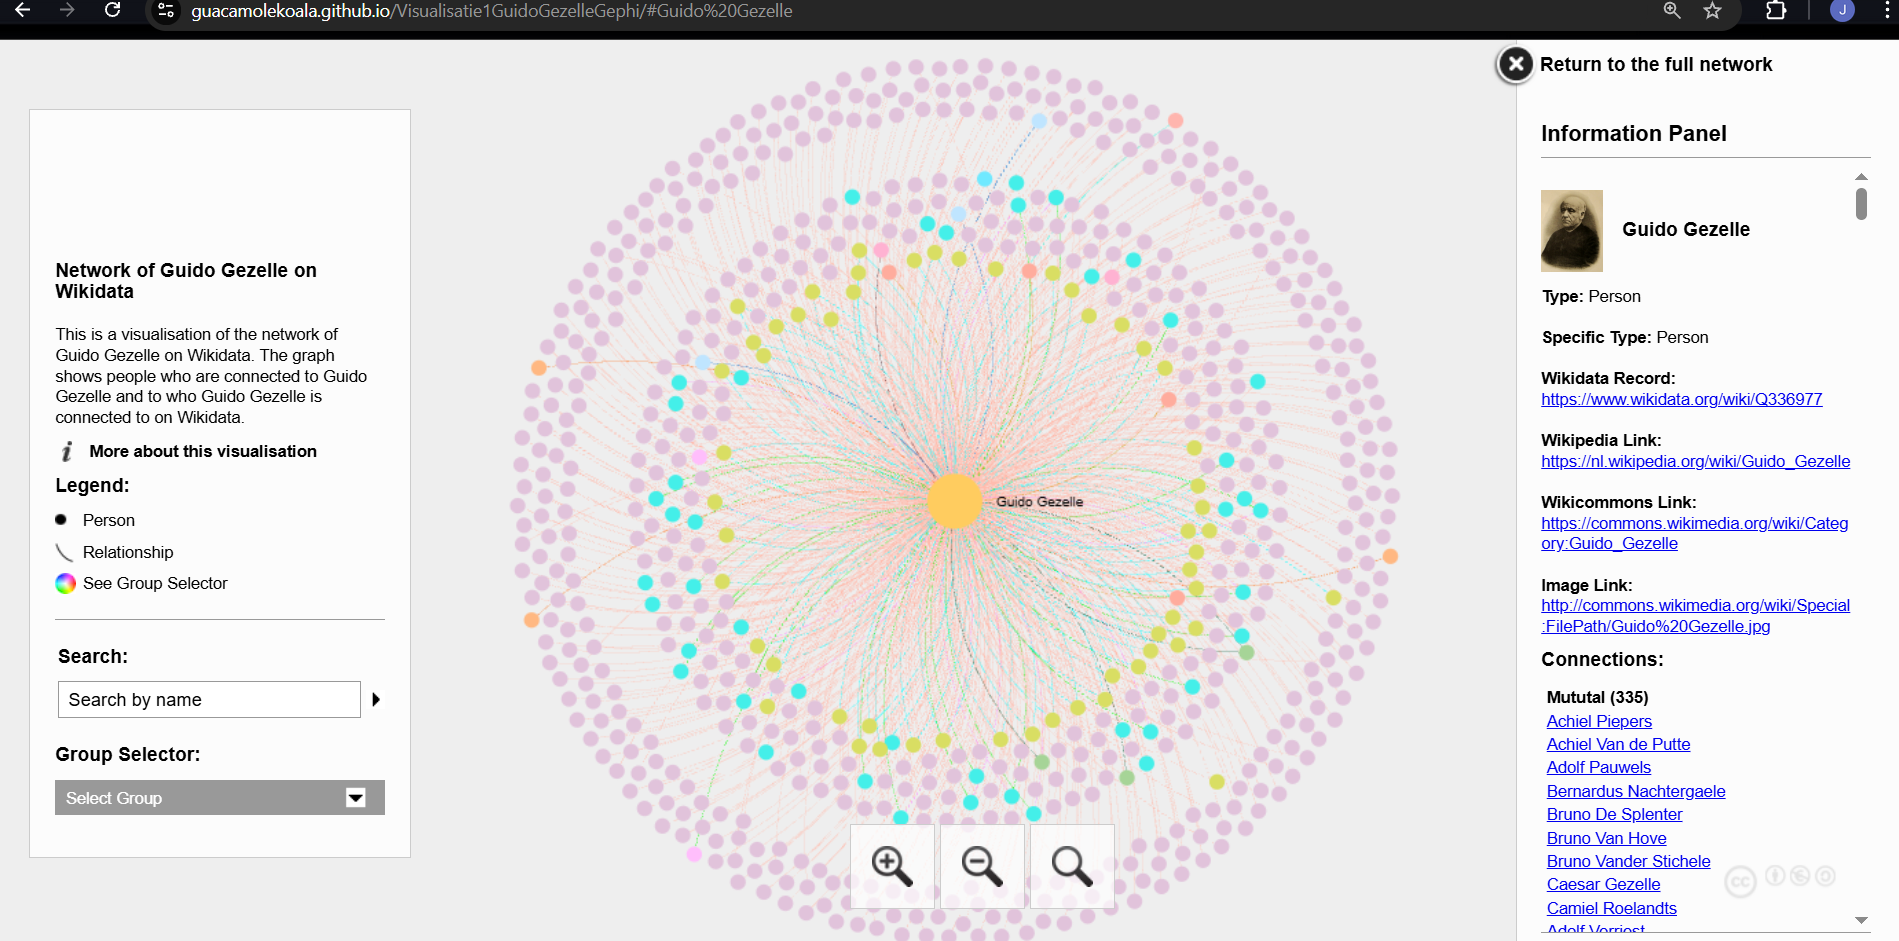

In deze handleiding werd een visualisatie gemaakt op basis van beschikbare data omtrent Guido Gezelle. Er werd getoond hoe een visualisatie te maken van alle personen in het netwerk van Guido Gezelle, met specificatie van relevante personen en familierelaties.
Eerst werden enkele queries ontworpen. Daarna werden deze via Spreadsheets omgezet naar een knopenbestand en een verbindingenbestand. Daarna werd getoond hoe deze bestanden opgeladen worden in Gephi en er een visualisatie van gemaakt wordt. Er werd stilgestaan bij de layout, alsook bij de export via Sigma. In een laatste fase werd de interactieve visualisatie online beschikbaar gemaakt als Github-webpagina. Met behulp van generatieve AI, in dit geval Gemini, werd de code aangepast om wat meer functionaliteit toe te voegen.

Hier plaatsen we het eindresultaat van dit proces. Via deze link kan de visualisatie bekeken worden: https://guacamolekoala.github.io/Visualisatie1GuidoGezelleGephi/